# Routing project analysis

* ``Two datasets we obtained in our researches will be examined in this notebook using necessary librarys and other tools to deeply analyze and 
  demonstrate features, characteristics, and insights of this dataset to demonstrate improvements we obtained in this research``

* ``The two dataset RoutingProject.csv (original routing projest which comes from built-in routing project in OMNeT++) and RoutingProject_after.csv
(The project we build to improve performance of routing project in variety of cases) will be used for analysis in this notebook``

* ``This analysis will compare RoutingProject and RoutingProject_after by performance, efficiency, and other metrics by comparing our obtained results, 
  this will show performance diffrences of independently performed topology, and centralized network performance``


### General analysis and look of the dataset

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importing necessary librarys to start analysis

In [261]:
RoutingResults = pd.read_csv("RoutingResults.csv",
                                   low_memory=False
                                  )
RoutingResults

# Loading RoutingResults and general look of the dataset

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
0,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,configname,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,datetime,20250422-19:02:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,datetimef,20250422-190251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,experiment,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129038,RandomMesh-0-20250422-19:02:59-10328,vector,RandomMesh.node[63].app,endToEndDelay:vector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129039,RandomMesh-0-20250422-19:02:59-10328,attr,RandomMesh.node[63].app,endToEndDelay:vector,interpolationmode,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129040,RandomMesh-0-20250422-19:02:59-10328,attr,RandomMesh.node[63].app,endToEndDelay:vector,recordingmode,vector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129041,RandomMesh-0-20250422-19:02:59-10328,attr,RandomMesh.node[63].app,endToEndDelay:vector,title,end-to-end delay of arrived packets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
RoutingResults_after = pd.read_csv("RoutingResults_after.csv",
                                   low_memory=False
                                  )
RoutingResults_after

# Loading RoutingResults_after and general look of the dataset

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
0,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,configname,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,datetime,20250422-19:52:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,datetimef,20250422-195247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,experiment,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137190,RandomMesh-0-20250422-19:53:09-8415,vector,RandomMesh.node[63].app,endToEndDelay:vector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137191,RandomMesh-0-20250422-19:53:09-8415,attr,RandomMesh.node[63].app,endToEndDelay:vector,interpolationmode,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137192,RandomMesh-0-20250422-19:53:09-8415,attr,RandomMesh.node[63].app,endToEndDelay:vector,recordingmode,vector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137193,RandomMesh-0-20250422-19:53:09-8415,attr,RandomMesh.node[63].app,endToEndDelay:vector,title,end-to-end delay of arrived packets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
RoutingResults.info()

# for seeing column names, how many null values we have in this data set, and also seeing what kind of data types constructing our dataset
# The last four columns in RoutingResults dataset are object values, these columns are binedges, binvalues, vectime, vecvalue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129043 entries, 0 to 129042
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run         129043 non-null  object 
 1   type        129043 non-null  object 
 2   module      128742 non-null  object 
 3   name        128742 non-null  object 
 4   attrname    90435 non-null   object 
 5   attrvalue   83791 non-null   object 
 6   value       32886 non-null   object 
 7   count       3742 non-null    float64
 8   sumweights  3742 non-null    float64
 9   mean        1997 non-null    float64
 10  stddev      1997 non-null    float64
 11  min         1997 non-null    float64
 12  max         1997 non-null    float64
 13  underflows  3742 non-null    float64
 14  overflows   3742 non-null    float64
 15  binedges    3742 non-null    object 
 16  binvalues   3742 non-null    object 
 17  vectime     73 non-null      object 
 18  vecvalue    73 non-null      object 
dtypes:

In [264]:
RoutingResults_after.info()

# for seeing column names, how many null values we have in this data set, and also seeing what kind of data types constructing our dataset
# The last four columns in this dataset are object values, these columns are binedges, binvalues, vectime, vecvalue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137195 entries, 0 to 137194
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run         137195 non-null  object 
 1   type        137195 non-null  object 
 2   module      136756 non-null  object 
 3   name        136756 non-null  object 
 4   attrname    94649 non-null   object 
 5   attrvalue   87645 non-null   object 
 6   value       36568 non-null   object 
 7   count       3906 non-null    float64
 8   sumweights  3906 non-null    float64
 9   mean        2025 non-null    float64
 10  stddev      2025 non-null    float64
 11  min         2025 non-null    float64
 12  max         2025 non-null    float64
 13  underflows  3906 non-null    float64
 14  overflows   3906 non-null    float64
 15  binedges    3906 non-null    object 
 16  binvalues   3906 non-null    object 
 17  vectime     73 non-null      object 
 18  vecvalue    73 non-null      object 
dtypes:

In [265]:
RoutingResults.iloc[100:110]

# for be able to see insights of this data set between specific index range in this case between 100 to 110,
# in this case we analyze look of the data set 

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
100,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,configname,Net5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,datetime,20250422-19:02:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,datetimef,20250422-190203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,experiment,Net5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Net5-0-20250422-19:02:03-10328,runattr,NaN,NaN,network,networks.Net5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
RoutingResults_after.iloc[100:110]

# for be able to see insights of this data set between specific index range in this case between 100 to 110,
# in this case we analyze look of the data set 

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
100,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,network,networks.Net60a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,processid,8415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,repetition,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,replication,#0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,resultdir,results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,runnumber,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Net60a-0-20250422-19:51:55-8415,runattr,NaN,NaN,seedset,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Net60a-0-20250422-19:51:55-8415,config,NaN,NaN,network,networks.Net60a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Net60a-0-20250422-19:51:55-8415,config,NaN,NaN,**.destAddresses,"""1 11 50""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Net60a-0-20250422-19:51:55-8415,config,NaN,NaN,sim-time-limit,100s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
RoutingResults.iloc[5000:5005]

# for be able to see middle of this data set between specific index range in this case between 5000 to 5005,
# in this case we analyze look of the data set 

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
5000,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[23].queue[3],drop:sum,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,Mesh-0-20250422-19:02:51-10328,attr,Mesh.node[23].queue[3],drop:sum,interpolationmode,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,Mesh-0-20250422-19:02:51-10328,attr,Mesh.node[23].queue[3],drop:sum,recordingmode,sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,Mesh-0-20250422-19:02:51-10328,attr,Mesh.node[23].queue[3],drop:sum,title,"dropped packet byte length, sum",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,Mesh-0-20250422-19:02:51-10328,attr,Mesh.node[23].queue[3],drop:sum,unit,bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
RoutingResults_after.iloc[5000:5005]

# for be able to see middle of this data set between specific index range in this case between 5000 to 5005,
# in this case we analyze look of the data set 

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
5000,Mesh-0-20250422-19:52:47-8415,attr,Mesh.node[23].queue[0],qlen:timeavg,interpolationmode,sample-hold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,Mesh-0-20250422-19:52:47-8415,attr,Mesh.node[23].queue[0],qlen:timeavg,recordingmode,timeavg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,Mesh-0-20250422-19:52:47-8415,attr,Mesh.node[23].queue[0],qlen:timeavg,title,"queue length, timeavg",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[23].queue[0],qlen:max,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,Mesh-0-20250422-19:52:47-8415,attr,Mesh.node[23].queue[0],qlen:max,interpolationmode,sample-hold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
RoutingResults.isna().sum()

# For seeing how many null values we have in each column

run                0
type               0
module           301
name             301
attrname       38608
attrvalue      45252
value          96157
count         125301
sumweights    125301
mean          127046
stddev        127046
min           127046
max           127046
underflows    125301
overflows     125301
binedges      125301
binvalues     125301
vectime       128970
vecvalue      128970
dtype: int64

In [270]:
RoutingResults_after.isna().sum()

# For seeing how many null values we have in each column

run                0
type               0
module           439
name             439
attrname       42546
attrvalue      49550
value         100627
count         133289
sumweights    133289
mean          135170
stddev        135170
min           135170
max           135170
underflows    133289
overflows     133289
binedges      133289
binvalues     133289
vectime       137122
vecvalue      137122
dtype: int64

In [271]:
RoutingResults.head(10)

# first ten row of the dataset

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
0,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,configname,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,datetime,20250422-19:02:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,datetimef,20250422-190251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,experiment,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mesh-0-20250422-19:02:51-10328,runattr,NaN,NaN,network,networks.Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
RoutingResults_after.head(10)

# first ten row of the dataset

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue
0,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,configname,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,datetime,20250422-19:52:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,datetimef,20250422-195247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,experiment,Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mesh-0-20250422-19:52:47-8415,runattr,NaN,NaN,network,networks.Mesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Diving into details of specific columns for this dataset

In [273]:
RoutingResults.run.head()

# first five run column of the dataset

0    Mesh-0-20250422-19:02:51-10328
1    Mesh-0-20250422-19:02:51-10328
2    Mesh-0-20250422-19:02:51-10328
3    Mesh-0-20250422-19:02:51-10328
4    Mesh-0-20250422-19:02:51-10328
Name: run, dtype: object

In [274]:
RoutingResults_after.run.head()

# first five run column of the dataset

0    Mesh-0-20250422-19:52:47-8415
1    Mesh-0-20250422-19:52:47-8415
2    Mesh-0-20250422-19:52:47-8415
3    Mesh-0-20250422-19:52:47-8415
4    Mesh-0-20250422-19:52:47-8415
Name: run, dtype: object

In [275]:
RoutingResults.dtypes

# for analyzing data types of these two datasets

run            object
type           object
module         object
name           object
attrname       object
attrvalue      object
value          object
count         float64
sumweights    float64
mean          float64
stddev        float64
min           float64
max           float64
underflows    float64
overflows     float64
binedges       object
binvalues      object
vectime        object
vecvalue       object
dtype: object

In [276]:
RoutingResults_after.dtypes

# for analyzing data types of these two datasets

run            object
type           object
module         object
name           object
attrname       object
attrvalue      object
value          object
count         float64
sumweights    float64
mean          float64
stddev        float64
min           float64
max           float64
underflows    float64
overflows     float64
binedges       object
binvalues      object
vectime        object
vecvalue       object
dtype: object

In [277]:
df = RoutingResults[['run','type','module','attrname','value']]
df.head()

# for analyzing run, type, module, attrname, value columns of these two datasets

,run,type,module,attrname,value
0,Mesh-0-20250422-19:02:51-10328,runattr,NaN,configname,NaN
1,Mesh-0-20250422-19:02:51-10328,runattr,NaN,datetime,NaN
2,Mesh-0-20250422-19:02:51-10328,runattr,NaN,datetimef,NaN
3,Mesh-0-20250422-19:02:51-10328,runattr,NaN,experiment,NaN
4,Mesh-0-20250422-19:02:51-10328,runattr,NaN,inifile,NaN


In [278]:
df = RoutingResults_after[['run','type','module','attrname','value']]
df.head()

# for analyzing run, type, module, attrname, value columns of these two datasets

,run,type,module,attrname,value
0,Mesh-0-20250422-19:52:47-8415,runattr,NaN,configname,NaN
1,Mesh-0-20250422-19:52:47-8415,runattr,NaN,datetime,NaN
2,Mesh-0-20250422-19:52:47-8415,runattr,NaN,datetimef,NaN
3,Mesh-0-20250422-19:52:47-8415,runattr,NaN,experiment,NaN
4,Mesh-0-20250422-19:52:47-8415,runattr,NaN,inifile,NaN


In [279]:
RoutingResults.module.describe()

# for module column of RoutingResults
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count                     128742
unique                      3205
top       Net60.rte[20].queue[0]
freq                         165
Name: module, dtype: object

In [280]:
RoutingResults_after.module.describe()

# for module column of RoutingResults_after
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count                    136756
unique                     3205
top       Net10.rte[8].queue[0]
freq                        222
Name: module, dtype: object

In [281]:
RoutingResults.value.describe()

# for value column of RoutingResults
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count     32886
unique     2185
top           0
freq      15583
Name: value, dtype: object

In [282]:
RoutingResults_after.value.describe()

# for value column of RoutingResults_after
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count     36568
unique     3325
top           0
freq      13778
Name: value, dtype: object

In [283]:
RoutingResults["value_numeric"] = pd.to_numeric(RoutingResults_after["value"], errors='coerce')
# Create new numeric column for value column with the name value_numeric for RoutingResults

RoutingResults["value_numeric"].describe()
# Describe value_numeric we have just created

count         21951.0000
mean       77815769.0711
std       766515845.7710
min               0.0000
25%               0.0000
50%               0.0000
75%              49.0000
max     12499812352.0000
Name: value_numeric, dtype: float64

In [284]:
RoutingResults_after["value_numeric"] = pd.to_numeric(RoutingResults_after["value"], errors='coerce')
# Create new numeric column for value column with the name value_numeric for RoutingResults_after

RoutingResults_after["value_numeric"].describe()
# Describe value_numeric we have just created

count         21951.0000
mean       77815769.0711
std       766515845.7710
min               0.0000
25%               0.0000
50%               0.0000
75%              49.0000
max     12499812352.0000
Name: value_numeric, dtype: float64

In [285]:
RoutingResults.drop(columns=["value_numeric"], inplace=True)

# Dropping value_numeric column that we just have created for making anysis on value column with numeric values

In [286]:
RoutingResults_after.drop(columns=["value_numeric"], inplace=True)

# Dropping value_numeric column that we just have created for making anysis on value column with numeric values

In [287]:
RoutingResults.name.describe()

# for name column of RoutingResults
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count         128742
unique            44
top       drop:count
freq           10495
Name: name, dtype: object

In [288]:
RoutingResults_after.name.describe()

# for name column of RoutingResults
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count         136756
unique            46
top       drop:count
freq           10955
Name: name, dtype: object

In [289]:
RoutingResults.attrname.describe()

# for attrname column of RoutingResults
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count     90435
unique       41
top       title
freq      21521
Name: attrname, dtype: object

In [290]:
RoutingResults_after.attrname.describe()

# for attrname column of RoutingResults_after
# count: Total non-null values
# unique: Number of unique module names (how many different values appear in the module column)
# top: The most frequent module name
# freq: How many times the top one appears

count                 94649
unique                   44
top       interpolationmode
freq                  22473
Name: attrname, dtype: object

In [291]:
unique_modules = RoutingResults.module.unique()

df = pd.DataFrame(unique_modules, columns=['UniqueModules'])

# gets all the unique values in the module column of your DataFrame RoutingResults_after
# then creates an numpy array after that converts that array into a new DataFrame

print(df)

              UniqueModules
0                       NaN
1          Mesh.node[0].app
2      Mesh.node[0].routing
3     Mesh.node[0].queue[0]
4     Mesh.node[0].queue[1]
...                     ...
3201    RandomMesh.node[60]
3202    RandomMesh.node[61]
3203    RandomMesh.node[62]
3204    RandomMesh.node[63]
3205             RandomMesh

[3206 rows x 1 columns]


In [292]:
unique_modules = RoutingResults_after.module.unique()

df = pd.DataFrame(unique_modules, columns=['UniqueModules'])

# gets all the unique values in the module column of your DataFrame RoutingResults_after
# then creates an numpy array after that converts that array into a new DataFrame

print(df)

              UniqueModules
0                       NaN
1          Mesh.node[0].app
2      Mesh.node[0].routing
3     Mesh.node[0].queue[0]
4     Mesh.node[0].queue[1]
...                     ...
3201    RandomMesh.node[60]
3202    RandomMesh.node[61]
3203    RandomMesh.node[62]
3204    RandomMesh.node[63]
3205             RandomMesh

[3206 rows x 1 columns]


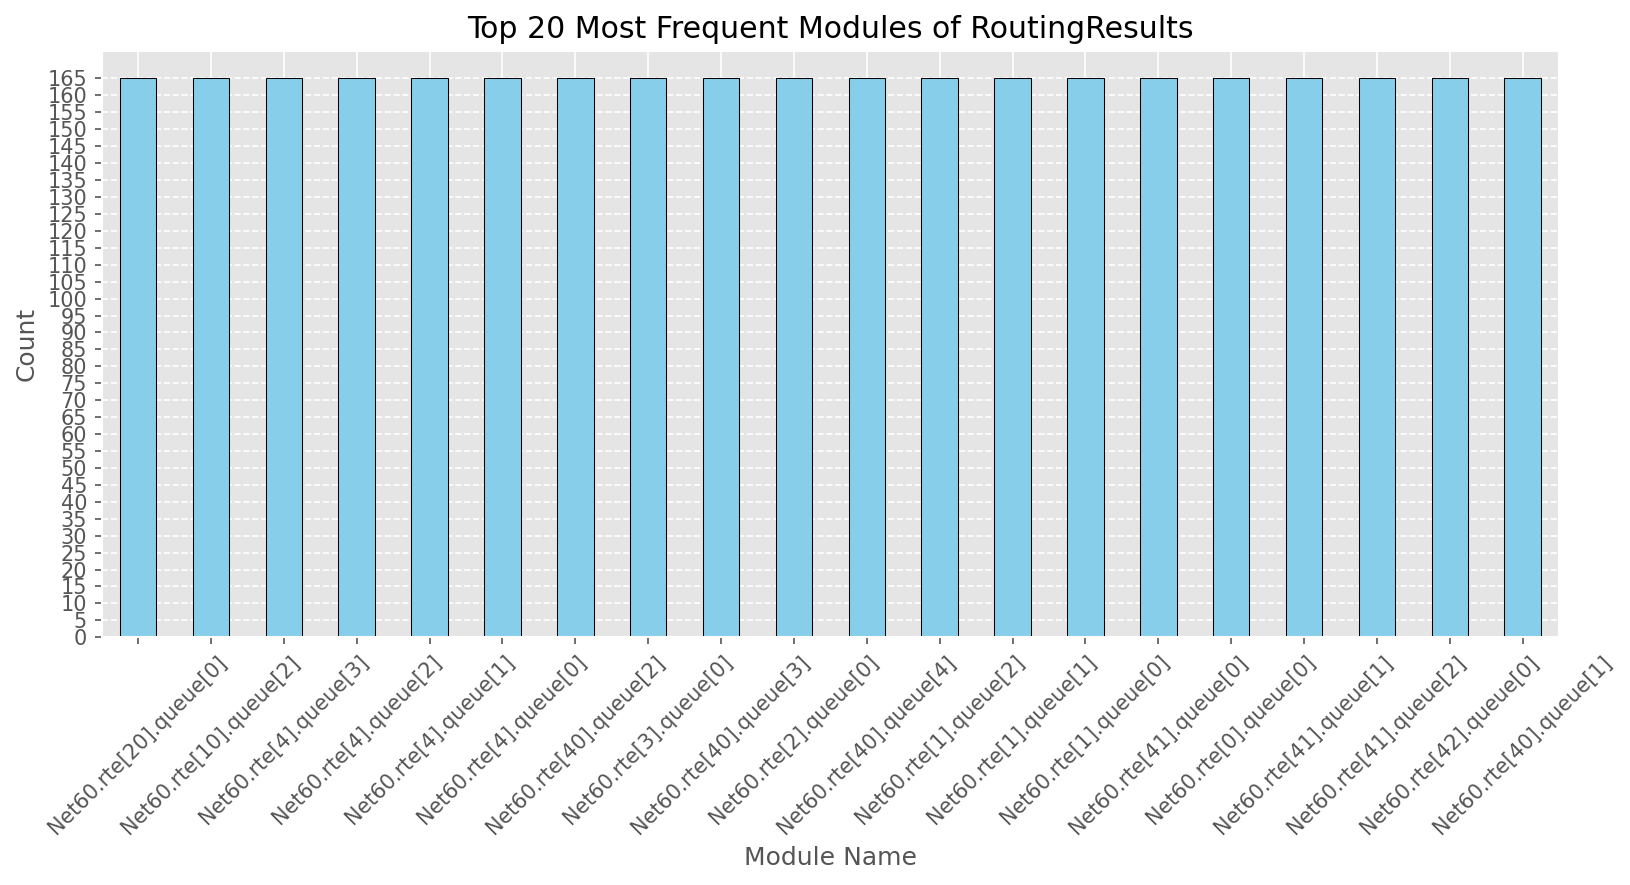

In [293]:
module_counts = RoutingResults.module.value_counts()

# Plot the top 50 most frequent modules
plt.figure(figsize=(11, 6))
module_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Most Frequent Modules of RoutingResults')
plt.xlabel('Module Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.yticks(np.arange(0, module_counts.max() + 5, 5))

plt.show()

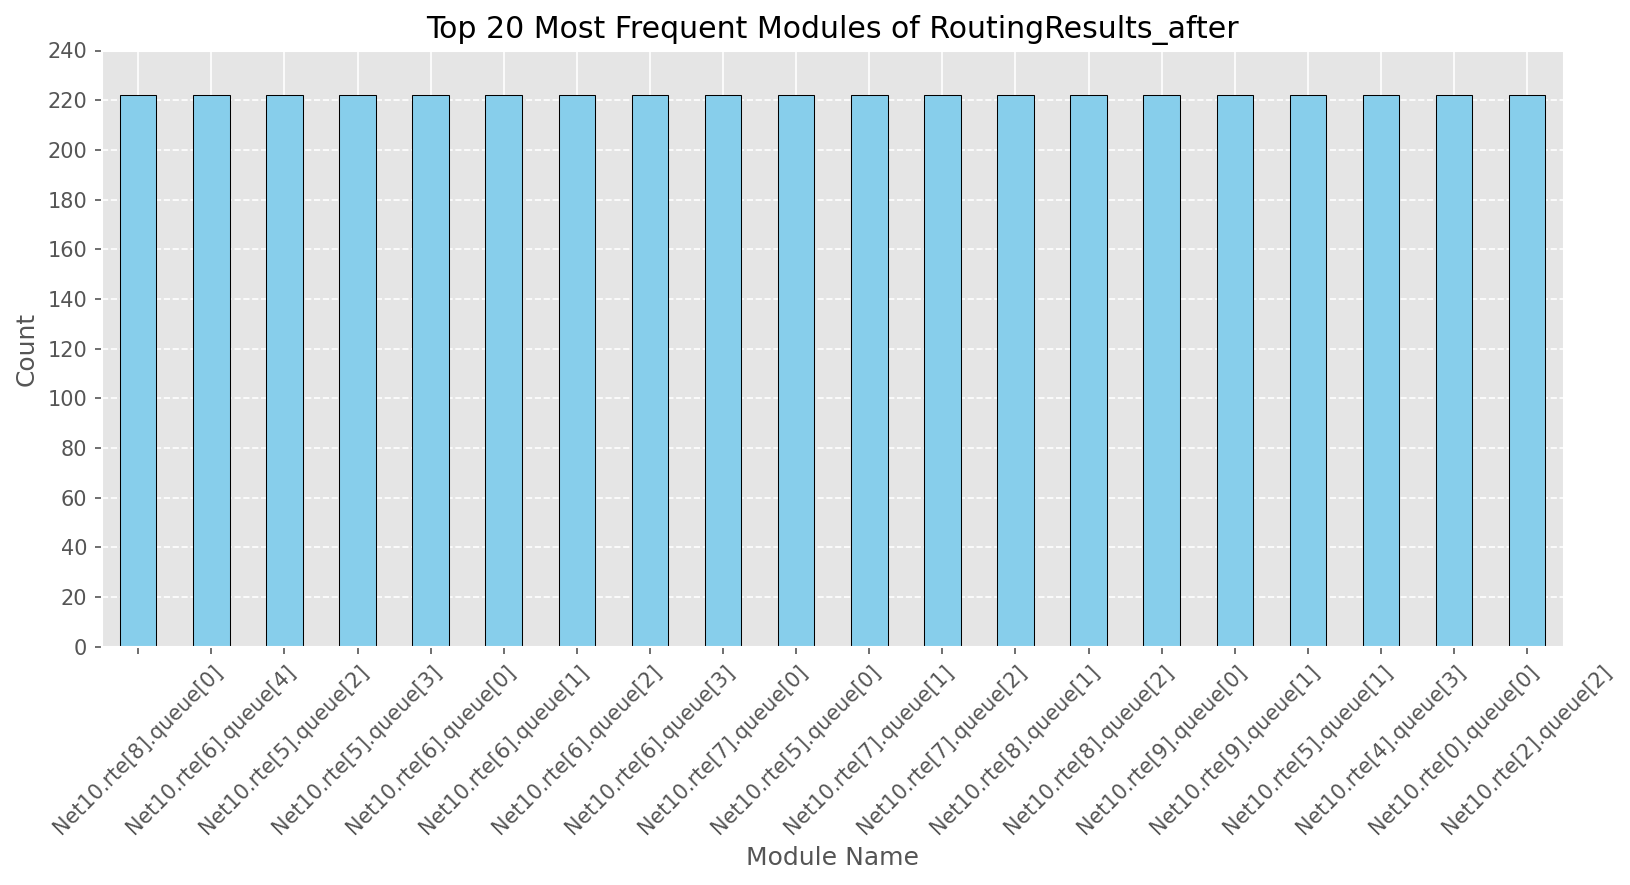

In [294]:
module_counts = RoutingResults_after.module.value_counts()

# Plot the top 50 most frequent modules
plt.figure(figsize=(11, 6))
module_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Most Frequent Modules of RoutingResults_after')
plt.xlabel('Module Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.yticks(np.arange(0, module_counts.max() + 20, 20))

plt.show()

In [295]:
# Create qname column for visualizing query name for RoutingResults
RoutingResults['qname'] = RoutingResults['module'] + '.' + RoutingResults['name']

# Filter and display
RoutingResults[RoutingResults['type'] == 'scalar'].head(3)

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
301,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,7.0150023441163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
305,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
309,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00093136783122363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean


In [296]:
# Create qname column for visualizing query name for RoutingResults_after
RoutingResults_after['qname'] = RoutingResults_after['module'] + '.' + RoutingResults_after['name']

# Filter and display
RoutingResults_after[RoutingResults_after['type'] == 'scalar'].head(3)

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
439,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,6.996587144522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
443,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
447,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00069995964953808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean


In [297]:
RoutingResults_after.drop(columns='qname', inplace=True)

# drop qname colun that we just created

In [298]:
RoutingResults.drop(columns='qname', inplace=True)

# drop qname colun that we just created

### Analyzing scalar type values in our datasets with some logical manipulations and conversion

``This part is for advance analysis of datasets we have using some specific columns based for demonstration and anlyzing on our scalar values``

In [299]:
# Filter scalar values for Node[0] only
node0_scalars = RoutingResults[
    (RoutingResults['type'] == 'scalar') &
    (RoutingResults['module'].str.contains(r'Node\[0\]', na=False))
]

# Select relevant columns
summary = node0_scalars[['module', 'name', 'value']]

# Pivot to view metrics as rows and their values
pivot = summary.pivot(index='name', values='value', columns='module')

# Display the result
print(pivot)

Empty DataFrame
Columns: []
Index: []


In [300]:
# Filter scalar values for Node[0] only
node0_scalars = RoutingResults_after[
    (RoutingResults_after['type'] == 'scalar') &
    (RoutingResults_after['module'].str.contains(r'Node\[0\]', na=False))
]

# Select relevant columns
summary = node0_scalars[['module', 'name', 'value']]

# Pivot to view metrics as rows and their values
pivot = summary.pivot(index='name', values='value', columns='module')

# Display the result
print(pivot)

Empty DataFrame
Columns: []
Index: []


* #### Definition of itervar

``when you run a simulation multiple times with different parameter values, those parameters are called iteration variables, or itervar for short.``

In [301]:
scalars_RoutingResults = RoutingResults[
    (RoutingResults['type'] == 'scalar') | 
    (RoutingResults['type'] == 'itervar')
]

scalars_RoutingResults = scalars_RoutingResults.assign(
    qname = scalars_RoutingResults['attrname'].combine_first(scalars_RoutingResults['module'] + '.' + scalars_RoutingResults['name'])
)

scalars_RoutingResults['value'] = scalars_RoutingResults['value'].combine_first(
    pd.to_numeric(scalars_RoutingResults['attrvalue'], errors='coerce')
)
# errors='coerce' will replace non-convertible strings with NaN (avoids crashing).
# This fills missing values (NaN) in the value column using the values from the right-hand side.
# If a row already has a value, it stays.
# If value is missing, it uses the numeric version of attrvalue.

scalars_RoutingResults[['run', 'type', 'qname', 'value', 'module', 'name', 'attrname']].iloc[8000:8005]

# This code is extracting and cleaning scalar and iteration variable data (type == 'scalar' or type == 'itervar')
# from the RoutingResults_after DataFrame, preparing it for analysis by creating a qualified name (qname)
# and ensuring a usable numeric value.

,run,type,qname,value,module,name,attrname
37663,Net60CutThrough-0-20250422-19:00:52-10328,scalar,Net60.rte[28].queue[1].qlen:max,0,Net60.rte[28].queue[1],qlen:max,NaN
37667,Net60CutThrough-0-20250422-19:00:52-10328,scalar,Net60.rte[28].queue[1].drop:count,0,Net60.rte[28].queue[1],drop:count,NaN
37672,Net60CutThrough-0-20250422-19:00:52-10328,scalar,Net60.rte[28].queue[1].drop:sum,0,Net60.rte[28].queue[1],drop:sum,NaN
37677,Net60CutThrough-0-20250422-19:00:52-10328,scalar,Net60.rte[28].queue[2].rxBytes:count,50088,Net60.rte[28].queue[2],rxBytes:count,NaN
37682,Net60CutThrough-0-20250422-19:00:52-10328,scalar,Net60.rte[28].queue[2].rxBytes:sum,1641283584,Net60.rte[28].queue[2],rxBytes:sum,NaN


In [302]:
scalars_RoutingResults_after = RoutingResults_after[
    (RoutingResults_after['type'] == 'scalar') | 
    (RoutingResults_after['type'] == 'itervar')
]

scalars_RoutingResults_after = scalars_RoutingResults_after.assign(
    qname = scalars_RoutingResults_after['attrname'].combine_first(scalars_RoutingResults_after['module'] + '.' + scalars_RoutingResults_after['name'])
)

scalars_RoutingResults_after['value'] = scalars_RoutingResults_after['value'].combine_first(
    pd.to_numeric(scalars_RoutingResults_after['attrvalue'], errors='coerce')
)
# errors='coerce' will replace non-convertible strings with NaN (avoids crashing).
# This fills missing values (NaN) in the value column using the values from the right-hand side.
# If a row already has a value, it stays.
# If value is missing, it uses the numeric version of attrvalue.

scalars_RoutingResults_after[['run', 'type', 'qname', 'value', 'module', 'name', 'attrname']].iloc[8000:8005]

# This code is extracting and cleaning scalar and iteration variable data (type == 'scalar' or type == 'itervar')
# from the RoutingResults_after DataFrame, preparing it for analysis by creating a qualified name (qname)
# and ensuring a usable numeric value.

,run,type,qname,value,module,name,attrname
37782,Net60CutThrough-0-20250422-19:50:54-8415,scalar,Net60.rte[4].queue[2].drop:sum,0,Net60.rte[4].queue[2],drop:sum,NaN
37787,Net60CutThrough-0-20250422-19:50:54-8415,scalar,Net60.rte[4].queue[3].rxBytes:count,149714,Net60.rte[4].queue[3],rxBytes:count,NaN
37792,Net60CutThrough-0-20250422-19:50:54-8415,scalar,Net60.rte[4].queue[3].rxBytes:sum,4905828352,Net60.rte[4].queue[3],rxBytes:sum,NaN
37797,Net60CutThrough-0-20250422-19:50:54-8415,scalar,Net60.rte[4].queue[3].txBytes:count,0,Net60.rte[4].queue[3],txBytes:count,NaN
37802,Net60CutThrough-0-20250422-19:50:54-8415,scalar,Net60.rte[4].queue[3].txBytes:sum,0,Net60.rte[4].queue[3],txBytes:sum,NaN


In [303]:
scalars_RoutingResults_wide = scalars_RoutingResults.pivot(index='run', columns='qname', values='value')
scalars_RoutingResults_wide.tail()

# Each run becomes a row.
# Each qname becomes a column.
# The value fills in the cells.

qname,Dynamic.rte1.app.endToEndDelay:max,Dynamic.rte1.app.endToEndDelay:mean,Dynamic.rte1.app.hopCount:max,Dynamic.rte1.app.hopCount:mean,Dynamic.rte1.queue[0].busy:timeavg,Dynamic.rte1.queue[0].drop:count,Dynamic.rte1.queue[0].drop:sum,Dynamic.rte1.queue[0].qlen:max,Dynamic.rte1.queue[0].qlen:timeavg,Dynamic.rte1.queue[0].rxBytes:count,...,RandomMesh.node[9].queue[3].qlen:max,RandomMesh.node[9].queue[3].qlen:timeavg,RandomMesh.node[9].queue[3].rxBytes:count,RandomMesh.node[9].queue[3].rxBytes:sum,RandomMesh.node[9].queue[3].txBytes:count,RandomMesh.node[9].queue[3].txBytes:sum,RandomMesh.node[9].routing.drop:count,RandomMesh.node[9].routing.drop:sum,cutThrough,iaMean
run,,,,,,,,,,,,,,,,,,,,,
Net60StoreAndForward-0-20250422-19:01:21-10328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net60a-0-20250422-19:01:56-10328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NetBuilder-0-20250422-19:03:06-10328,0.973569631032,0.41582417733521,13,7.7675100843418,0,0,0,0,0,107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RandomGraph-0-20250422-19:02:43-10328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RandomMesh-0-20250422-19:02:59-10328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [304]:
scalars_RoutingResults_after_wide = scalars_RoutingResults_after.pivot(index='run', columns='qname', values='value')
scalars_RoutingResults_after_wide.tail()

# Each run becomes a row.
# Each qname becomes a column.
# The value fills in the cells.

qname,Dynamic.rte1.app.endToEndDelay:max,Dynamic.rte1.app.endToEndDelay:mean,Dynamic.rte1.app.hopCount:max,Dynamic.rte1.app.hopCount:mean,Dynamic.rte1.queue[0].busy:timeavg,Dynamic.rte1.queue[0].drop:count,Dynamic.rte1.queue[0].drop:sum,Dynamic.rte1.queue[0].qlen:max,Dynamic.rte1.queue[0].qlen:timeavg,Dynamic.rte1.queue[0].rxBytes:count,...,RandomMesh.node[9].queue[3].qlen:max,RandomMesh.node[9].queue[3].qlen:timeavg,RandomMesh.node[9].queue[3].rxBytes:count,RandomMesh.node[9].queue[3].rxBytes:sum,RandomMesh.node[9].queue[3].txBytes:count,RandomMesh.node[9].queue[3].txBytes:sum,RandomMesh.node[9].routing.drop:count,RandomMesh.node[9].routing.drop:sum,cutThrough,iaMean
run,,,,,,,,,,,,,,,,,,,,,
Net60StoreAndForward-0-20250422-19:51:17-8415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net60a-0-20250422-19:51:55-8415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NetBuilder-0-20250422-19:53:37-8415,14.685287701272,0.91581872454827,12,0.84190337963923,0,0,0,0,0,9740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RandomGraph-0-20250422-19:52:40-8415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RandomMesh-0-20250422-19:53:09-8415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [305]:
selected_columns = [
    'Dynamic.rte1.app.endToEndDelay:max',
    'Dynamic.rte1.app.endToEndDelay:mean',
    'Dynamic.rte1.app.hopCount:max',
    'Dynamic.rte1.app.hopCount:mean',
    'Dynamic.rte1.queue[0].busy:timeavg',
    'Dynamic.rte1.queue[0].drop:count',
    'Dynamic.rte1.queue[0].drop:sum'
]


In [306]:
filtered_scalars = scalars_RoutingResults[scalars_RoutingResults['qname'].isin(selected_columns)]
# Filter the DataFrame using isin to select only the rows where qname is in selected_columns

scalars_RoutingResults_wide = filtered_scalars.pivot(
    index='run', 
    columns='qname', 
    values='value'
)
scalars_RoutingResults_wide.tail()

# Each run becomes a row.
# Each qname becomes a column.
# The value fills in the cells.

qname,Dynamic.rte1.app.endToEndDelay:max,Dynamic.rte1.app.endToEndDelay:mean,Dynamic.rte1.app.hopCount:max,Dynamic.rte1.app.hopCount:mean,Dynamic.rte1.queue[0].busy:timeavg,Dynamic.rte1.queue[0].drop:count,Dynamic.rte1.queue[0].drop:sum
run,,,,,,,
NetBuilder-0-20250422-19:03:06-10328,0.973569631032,0.41582417733521,13,7.7675100843418,0,0,0


In [307]:
filtered_scalars = scalars_RoutingResults_after[scalars_RoutingResults_after['qname'].isin(selected_columns)]
# Filter the DataFrame using isin to select only the rows where qname is in selected_columns

scalars_RoutingResults_after_wide = filtered_scalars.pivot(
    index='run', 
    columns='qname', 
    values='value'
)
scalars_RoutingResults_after_wide.tail()

# Each run becomes a row.
# Each qname becomes a column.
# The value fills in the cells.

qname,Dynamic.rte1.app.endToEndDelay:max,Dynamic.rte1.app.endToEndDelay:mean,Dynamic.rte1.app.hopCount:max,Dynamic.rte1.app.hopCount:mean,Dynamic.rte1.queue[0].busy:timeavg,Dynamic.rte1.queue[0].drop:count,Dynamic.rte1.queue[0].drop:sum
run,,,,,,,
NetBuilder-0-20250422-19:53:37-8415,14.685287701272,0.91581872454827,12,0.84190337963923,0,0,0


In [308]:
RoutingResults['qname'] = RoutingResults.module + "." + RoutingResults.name

RoutingResults[RoutingResults.type == 'scalar'].head()  


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
301,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,7.0150023441163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
305,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
309,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00093136783122363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean
314,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,endToEndDelay:max,NaN,NaN,0.001858752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:max
319,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].routing,drop:count,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].routing.drop:count


In [309]:
RoutingResults_after['qname'] = RoutingResults_after.module + "." + RoutingResults_after.name

RoutingResults_after[RoutingResults_after.type == 'scalar'].head()  


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
439,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,6.996587144522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
443,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
447,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00069995964953808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean
452,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,endToEndDelay:max,NaN,NaN,0.001424468822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:max
457,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].routing,drop:count,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].routing.drop:count


In [310]:
RoutingResults = RoutingResults.assign(
    qname = RoutingResults['module'] + '.' + RoutingResults['name']
)

RoutingResults[RoutingResults['type'] == 'scalar'].head()


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
301,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,7.0150023441163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
305,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
309,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00093136783122363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean
314,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].app,endToEndDelay:max,NaN,NaN,0.001858752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:max
319,Mesh-0-20250422-19:02:51-10328,scalar,Mesh.node[0].routing,drop:count,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].routing.drop:count


In [311]:
RoutingResults_after = RoutingResults_after.assign(
    qname = RoutingResults_after['module'] + '.' + RoutingResults_after['name']
)

RoutingResults_after[RoutingResults_after['type'] == 'scalar'].head()


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,underflows,overflows,binedges,binvalues,vectime,vecvalue,qname
439,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:mean,NaN,NaN,6.996587144522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:mean
443,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,hopCount:max,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.hopCount:max
447,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,endToEndDelay:mean,NaN,NaN,0.00069995964953808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:mean
452,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].app,endToEndDelay:max,NaN,NaN,0.001424468822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].app.endToEndDelay:max
457,Mesh-0-20250422-19:52:47-8415,scalar,Mesh.node[0].routing,drop:count,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesh.node[0].routing.drop:count


# Numeric evaluations and plottings

#####  * ``This part will show us actual differences of this two dataset numerically``
#####  * ``Variety of mathematical calculations and graph plottings will be used to show enhancements in obtained results``
#####  * ``Datasets will be re-imported to avoid confusion and potential errors.``

### necessary imports

In [312]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display

### necessary configuration to be able to analyze them efficiently

In [313]:
# necessary configuration to be able to analyze them efficiently
plt.style.use('ggplot')
sns.set_palette("husl")
pd.options.display.float_format = '{:.4f}'.format
plt.rcParams['figure.dpi'] = 150

### Data Loading & Cleaning

In [314]:
import pandas as pd
import numpy as np

# Load raw CSVs
df_before = pd.read_csv('RoutingResults.csv', low_memory=False)
df_after = pd.read_csv('RoutingResults_after.csv', low_memory=False)

def clean_dataset(df):
    """Filter and clean only scalar data"""
    # Keep only 'scalar' rows (the real measurement data)
    df = df[df['type'] == 'scalar'].copy()

    # Convert important numeric fields
    numeric_cols = ['value', 'count', 'sumweights', 'mean', 'stddev']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing 'value'
    df = df.dropna(subset=['value'])

    # Extract metric name (e.g., endToEndDelay:mean)
    df['metric'] = df['name'].str.extract(r'(\w+:\w+)')[0]

    # Tag module types
    df['module_type'] = np.where(df['module'].str.contains('queue', na=False), 'Queue',
                                 np.where(df['module'].str.contains('routing', na=False), 'Router', 'Application'))

    return df

# Apply cleaning
df_before_clean = clean_dataset(df_before)
df_after_clean = clean_dataset(df_after)

# Quick stats
print(f"Cleaned BEFORE shape: {df_before_clean.shape}")
print(f"Cleaned AFTER shape: {df_after_clean.shape}")


Cleaned BEFORE shape: (15799, 21)
Cleaned AFTER shape: (16495, 21)


### Data summary

In [315]:
#Data summary
print("Before Dataset:")
print(f"- Records: {len(df_before_clean):,}")
print(f"- Nodes: {df_before_clean['module'].nunique()}")
print(f"- Metrics: {df_before_clean['metric'].nunique()}")

print("\nAfter Dataset:")
print(f"- Records: {len(df_after_clean):,}")
print(f"- Nodes: {df_after_clean['module'].nunique()}")
print(f"- Metrics: {df_after_clean['metric'].nunique()}")

Before Dataset:
- Records: 15,799
- Nodes: 1617
- Metrics: 13

After Dataset:
- Records: 16,495
- Nodes: 1617
- Metrics: 13


### Initial comparison function

In [316]:
# Initial comparison function
def initial_comparison():
    basic_metrics = ['hopCount:mean', 'endToEndDelay:mean', 
                     'drop:count', 'txBytes:sum', 'rxBytes:sum']
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()
    
    for idx, metric in enumerate(basic_metrics):
        before = df_before_clean[df_before_clean['metric'] == metric]['value']
        after = df_after_clean[df_after_clean['metric'] == metric]['value']
        
        sns.kdeplot(before, ax=axs[idx], label='Before', fill=True, legend=True)
        sns.kdeplot(after, ax=axs[idx], label='After', fill=True, legend=True)
        
        axs[idx].set_title(metric.split(':')[0].upper())
        axs[idx].set_xlabel('Value' if idx >= 3 else '')
        axs[idx].legend()  # Ensure legend is shown

    axs[-1].axis('off')  # Turn off the unused subplot
    plt.tight_layout()
    plt.show()
    
    summary = pd.DataFrame({
        'Metric': basic_metrics,
        'Before Mean': [df_before_clean[df_before_clean['metric'] == m]['value'].mean() for m in basic_metrics],
        'After Mean': [df_after_clean[df_after_clean['metric'] == m]['value'].mean() for m in basic_metrics],
        '% Change': [(df_after_clean[df_after_clean['metric'] == m]['value'].mean() - 
                      df_before_clean[df_before_clean['metric'] == m]['value'].mean()) /
                     df_before_clean[df_before_clean['metric'] == m]['value'].mean() * 100 
                     for m in basic_metrics]
    })
    
    print("\nInitial Comparison Summary:")
    display(summary.style.format({'Before Mean': '{:.2f}', 'After Mean': '{:.2f}', '% Change': '{:.2f}%'}))

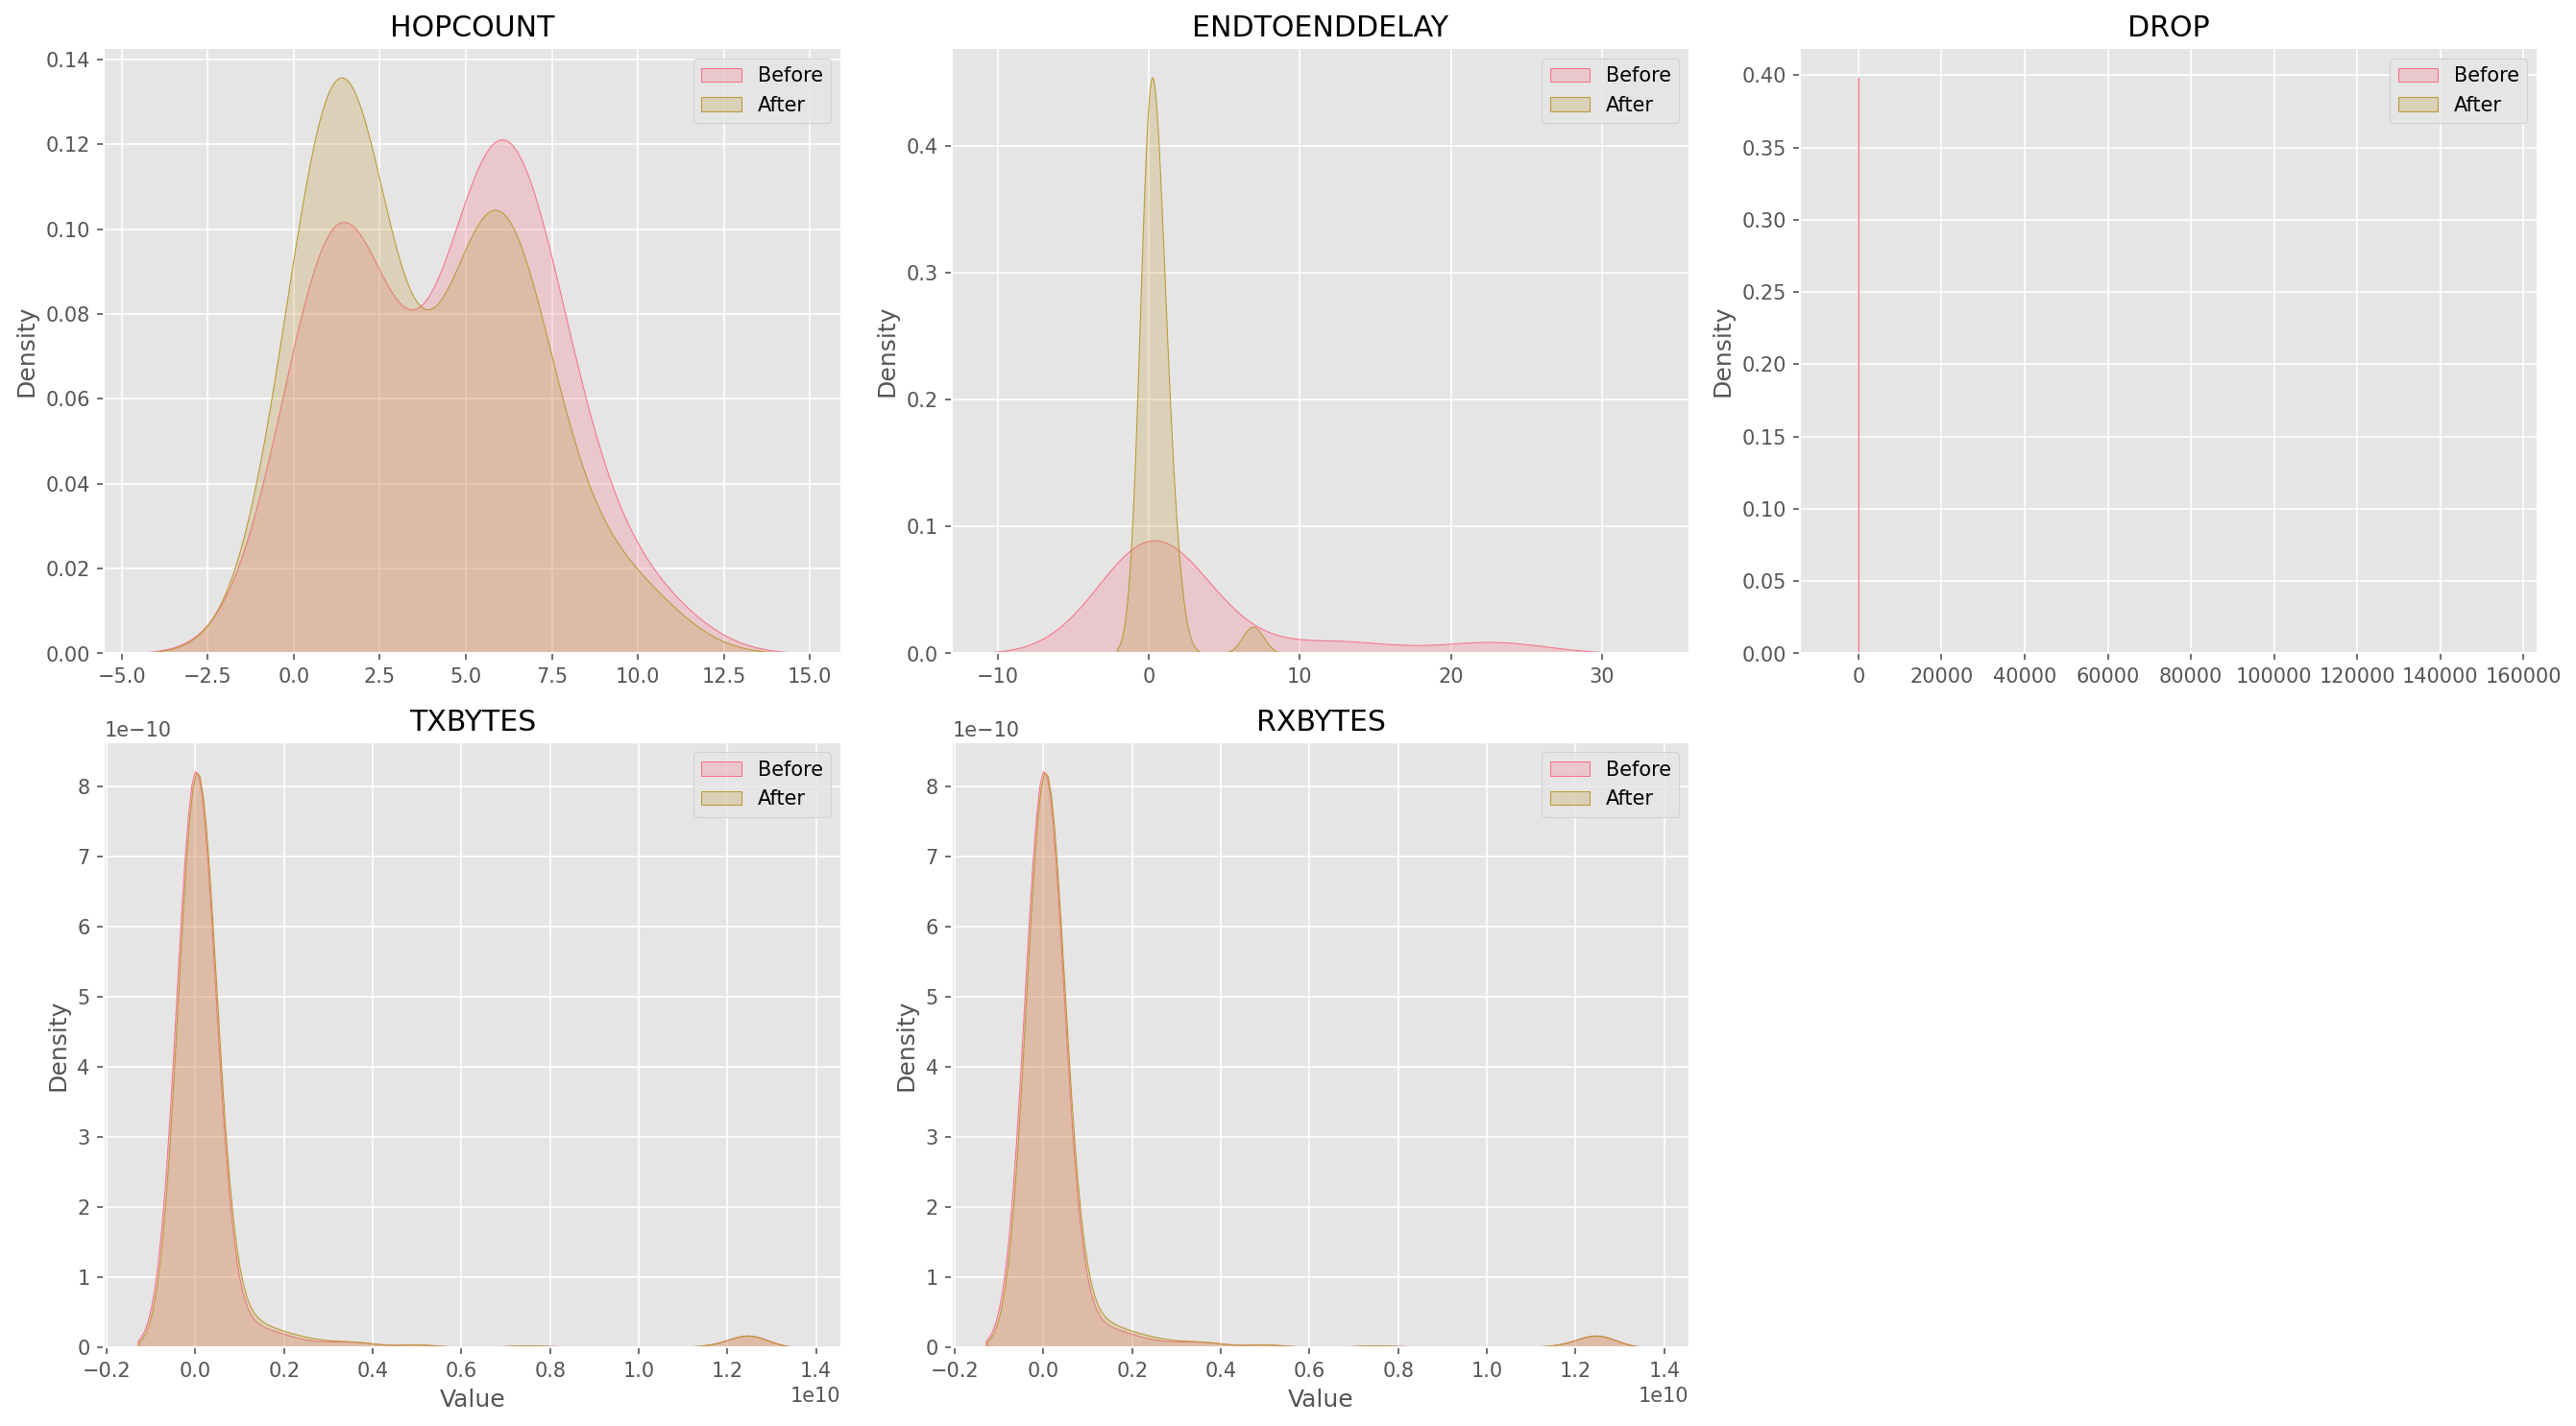


Initial Comparison Summary:


,Metric,Before Mean,After Mean,% Change
0,hopCount:mean,4.40,3.75,-14.81%
1,endToEndDelay:mean,3.29,0.61,-81.59%
2,drop:count,0.40,1590.35,397771.50%
3,txBytes:sum,443136031.00,481402209.21,8.64%
4,rxBytes:sum,443134885.79,481401593.02,8.64%


In [317]:
initial_comparison()

### Core Metric Analysis
``Detailed performance evaluation across key metrics``


### Core Metric Distributions

In [318]:
#Core metric comparison plot
core_metrics = {
    'hopCount:mean': 'Routing Efficiency',
    'endToEndDelay:mean': 'Latency',
    'drop:count': 'Packet Loss',
    'txBytes:sum': 'Throughput',
    'qlen:timeavg': 'Queue Utilization'
}

def plot_core_comparison():
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()
    
    colors = {'Before': '#1f77b4', 'After': '#ff7f0e'}  # blue = before, orange = after
    
    for idx, (metric, label) in enumerate(core_metrics.items()):
        before = df_before_clean[df_before_clean['metric'] == metric]['value']
        after = df_after_clean[df_after_clean['metric'] == metric]['value']
        
        sns.kdeplot(before, ax=axs[idx], label='Before', fill=True, color=colors['Before'])
        sns.kdeplot(after, ax=axs[idx], label='After', fill=True, color=colors['After'])
        
        axs[idx].set_title(label)
        axs[idx].set_xlabel('')
        axs[idx].legend(title='Dataset')
        
        # Statistical annotation
        t_stat, p_val = stats.ttest_ind(before, after)
        delta = after.mean() - before.mean()
        axs[idx].annotate(f'p = {p_val:.4f}\nΔμ = {delta:.2f}',
                          xy=(0.65, 0.85), xycoords='axes fraction',
                          bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

    axs[-1].axis('off')  # Last empty subplot
    plt.tight_layout()
    plt.show()


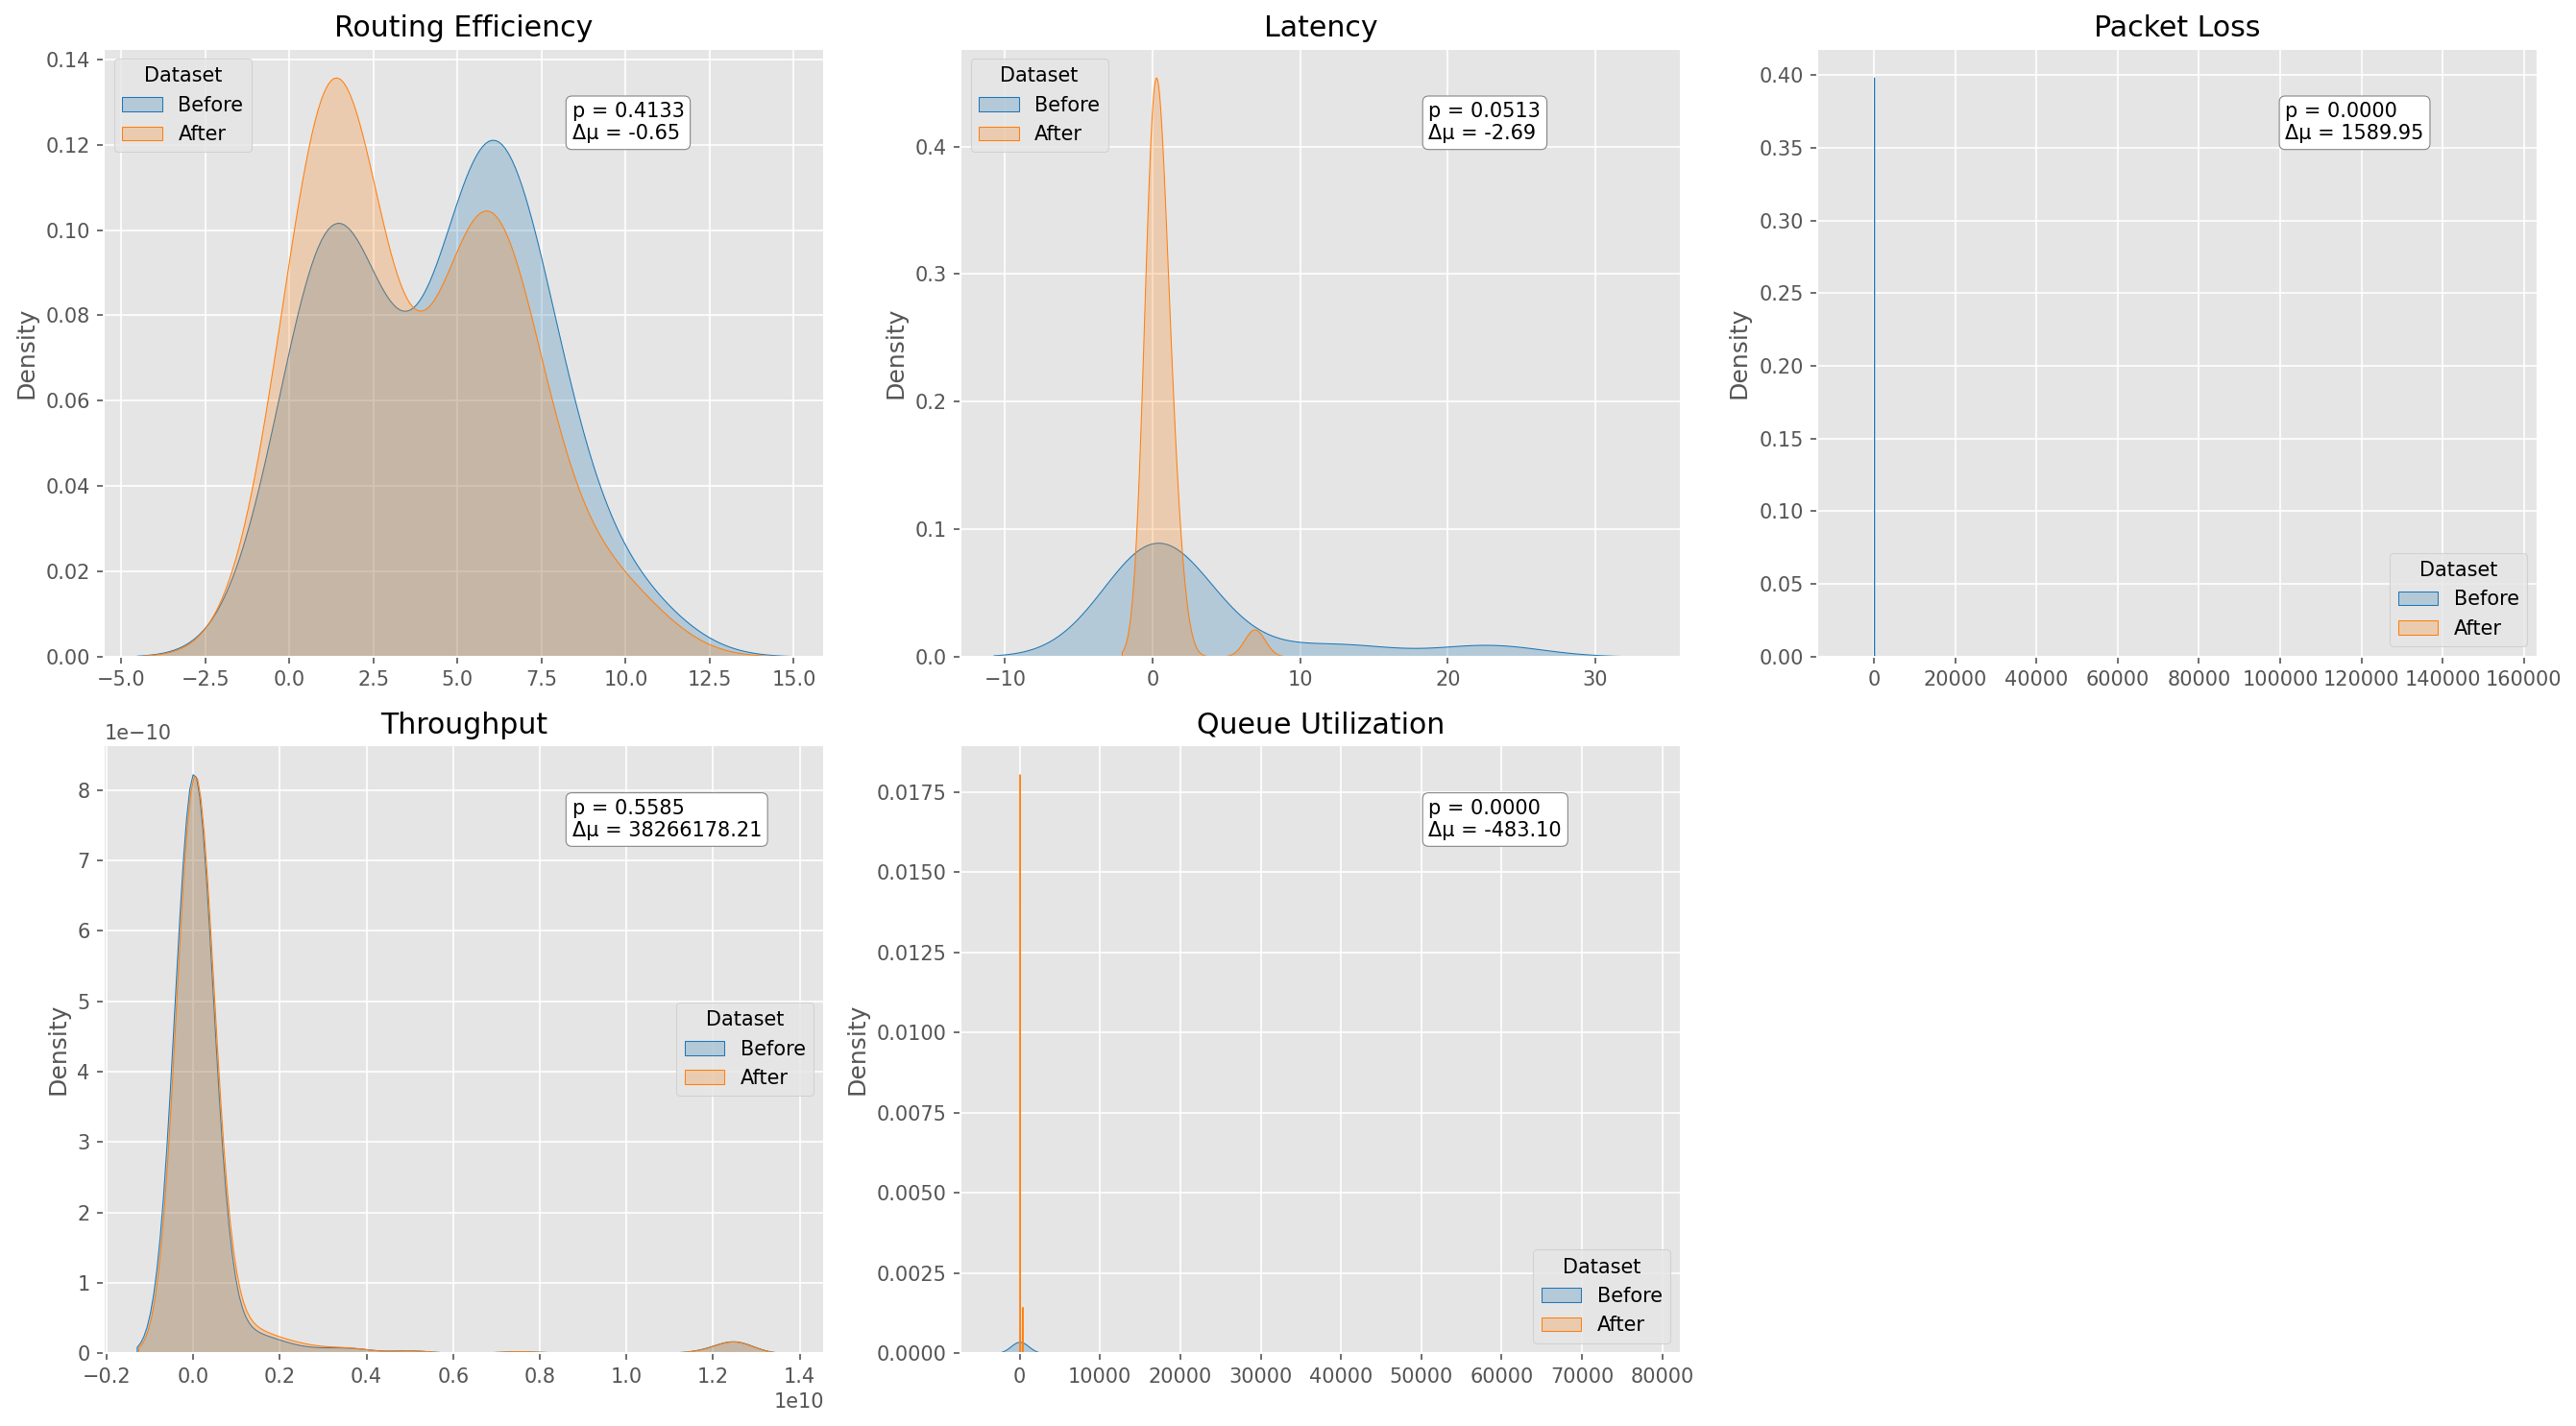

In [319]:
plot_core_comparison()

### Throughput analysis

In [320]:
def analyze_throughput():
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(
        x='dataset', 
        y='value', 
        data=pd.concat([
            df_before_clean[df_before_clean['metric'] == 'txBytes:sum'].assign(dataset='Before'),
            df_after_clean[df_after_clean['metric'] == 'txBytes:sum'].assign(dataset='After')
        ]),
        ax=ax[0]
    )
    ax[0].set_title('Transmitted Bytes Comparison')
    
    sns.boxplot(
        x='dataset', 
        y='value', 
        data=pd.concat([
            df_before_clean[df_before_clean['metric'] == 'rxBytes:sum'].assign(dataset='Before'),
            df_after_clean[df_after_clean['metric'] == 'rxBytes:sum'].assign(dataset='After')
        ]),
        ax=ax[1]
    )
    ax[1].set_title('Received Bytes Comparison')
    
    plt.tight_layout()
    plt.show()
    
    for metric in ['txBytes:sum', 'rxBytes:sum']:
        before = df_before_clean[df_before_clean['metric'] == metric]['value']
        after = df_after_clean[df_after_clean['metric'] == metric]['value']
        t_stat, p_val = stats.mannwhitneyu(before, after)
        print(f"{metric}: MWU p-value = {p_val:.4f}")

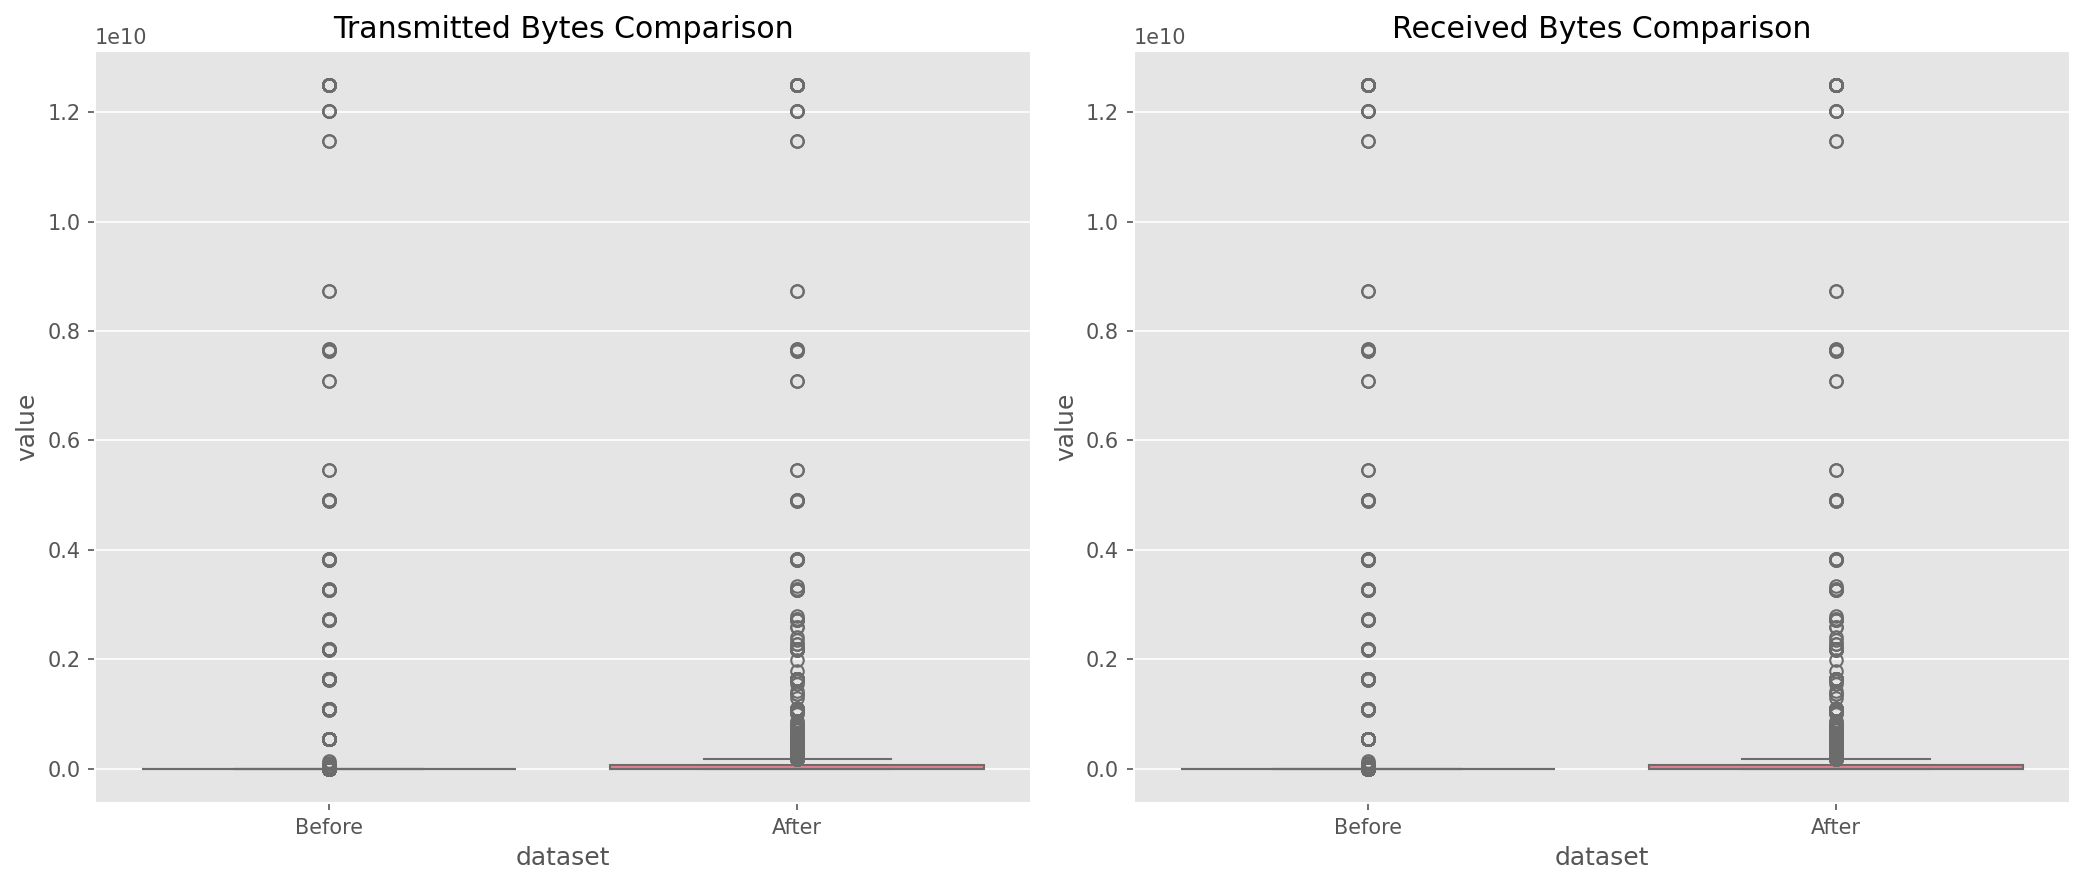

txBytes:sum: MWU p-value = 0.0000
rxBytes:sum: MWU p-value = 0.0000


In [321]:
analyze_throughput()

### Latency Analysis

In [322]:
def latency_analysis():
    fig = plt.figure(figsize=(16,6))
    
    ax1 = plt.subplot(1, 2, 1)
    for dataset, color in zip(['Before', 'After'], ['#1f77b4', '#ff7f0e']):
        data = df_before_clean if dataset == 'Before' else df_after_clean
        values = data[data['metric'] == 'endToEndDelay:mean']['value']
        counts, bins = np.histogram(values, bins=50)
        pdf = counts / sum(counts)
        cdf = np.cumsum(pdf)
        plt.plot(bins[1:], cdf, label=dataset, color=color)
    
    plt.title('Cumulative Latency Distribution')
    plt.legend()
    
    ax2 = plt.subplot(1, 2, 2)
    merged = pd.merge(
        df_after_clean[df_after_clean['metric'] == 'endToEndDelay:mean'],
        df_after_clean[df_after_clean['metric'] == 'txBytes:sum'],
        on=['module', 'vectime'],
        suffixes=('_latency', '_throughput')
    )
    sns.scatterplot(x='value_throughput', y='value_latency', 
                   data=merged, alpha=0.6, ax=ax2)
    plt.title('Latency vs Throughput (After)')
    
    plt.tight_layout()
    plt.show()

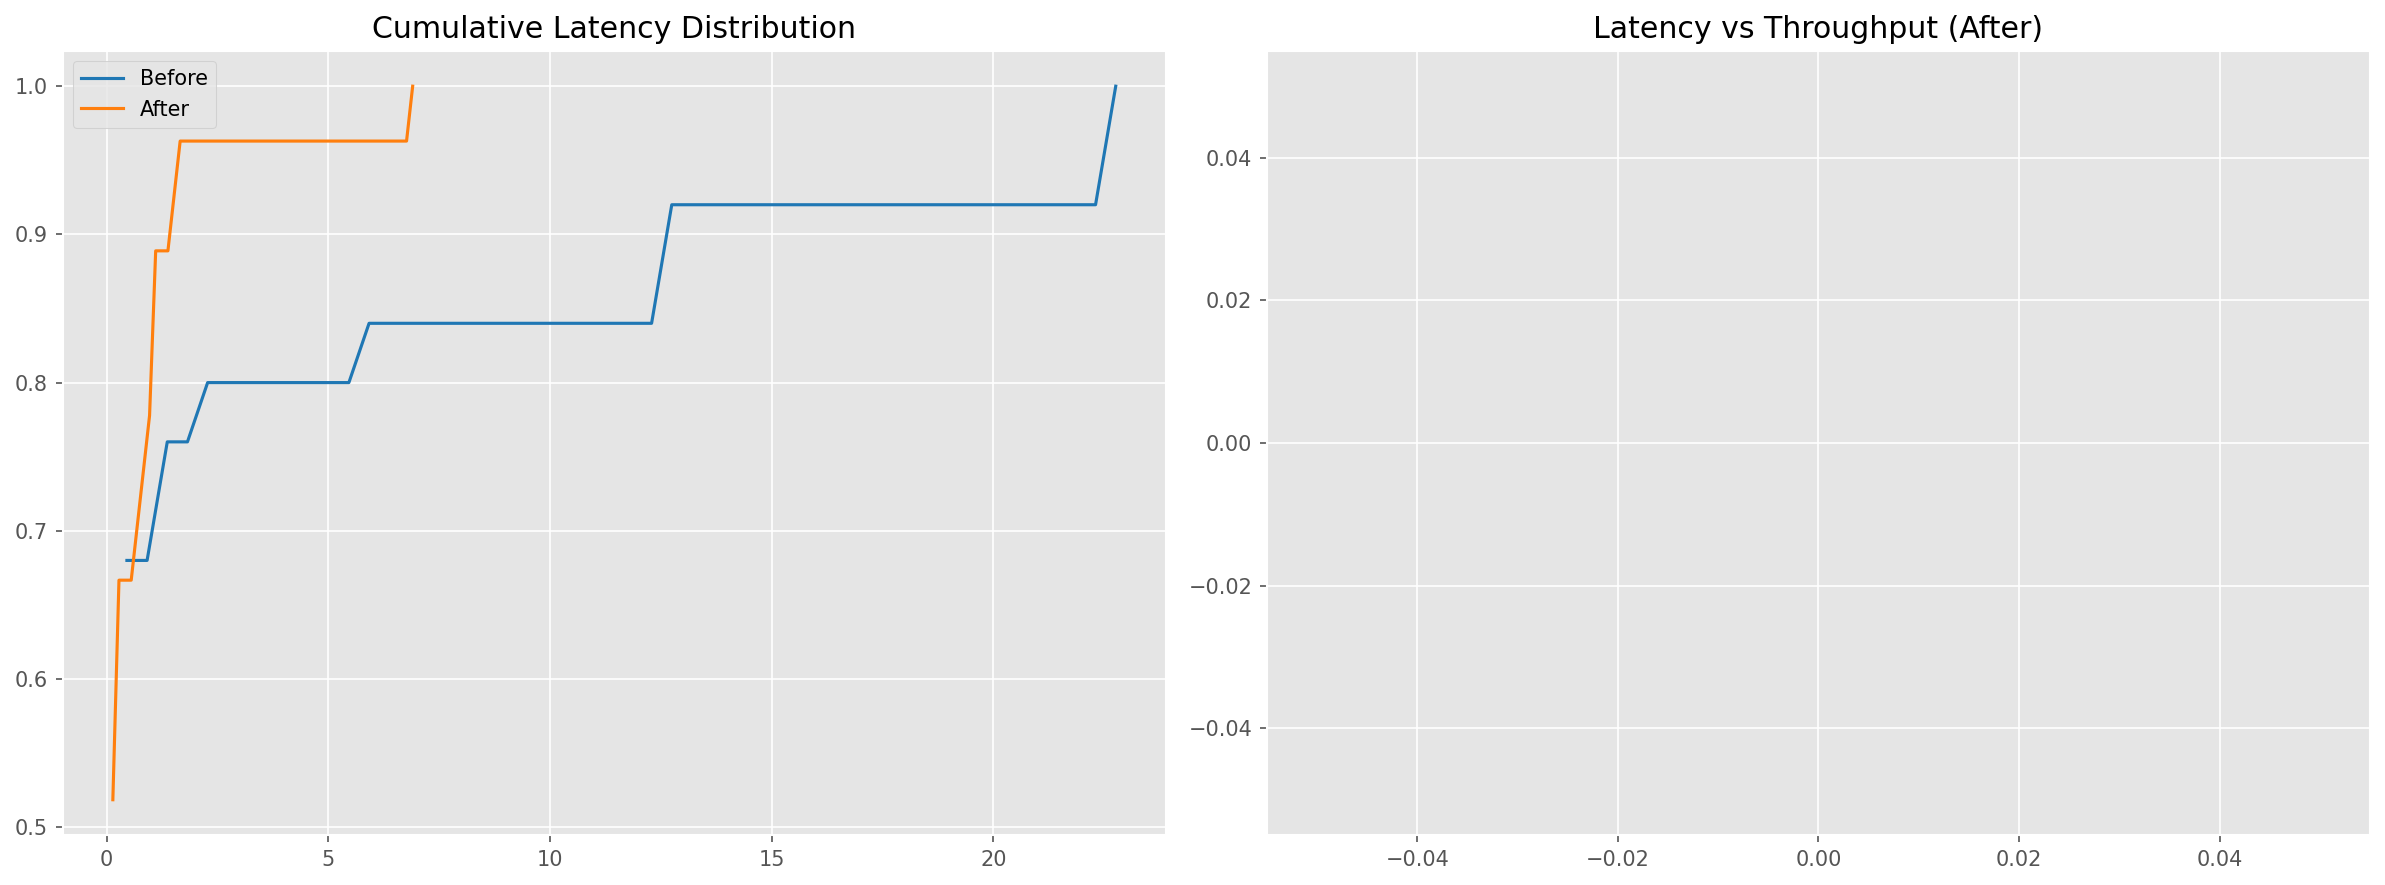

In [323]:
latency_analysis()

### Queue Dynamics Analysis

In [324]:
def queue_analysis():
    fig, ax = plt.subplots(1, 2, figsize=(14,6))
    
    sns.violinplot(x='dataset', y='value', 
                  data=pd.concat([
                      df_before_clean[df_before_clean['metric'] == 'qlen:timeavg'].assign(dataset='Before'),
                      df_after_clean[df_after_clean['metric'] == 'qlen:timeavg'].assign(dataset='After')
                  ]), ax=ax[0])
    ax[0].set_title('Queue Length Distribution')
    
    sns.lineplot(data=df_before_clean[df_before_clean['metric'] == 'qlen:timeavg'],
                x='vectime', y='value', label='Before', ax=ax[1])
    sns.lineplot(data=df_after_clean[df_after_clean['metric'] == 'qlen:timeavg'],
                x='vectime', y='value', label='After', ax=ax[1])
    ax[1].set_title('Queue Utilization Timeline')
    
    plt.tight_layout()
    plt.show()

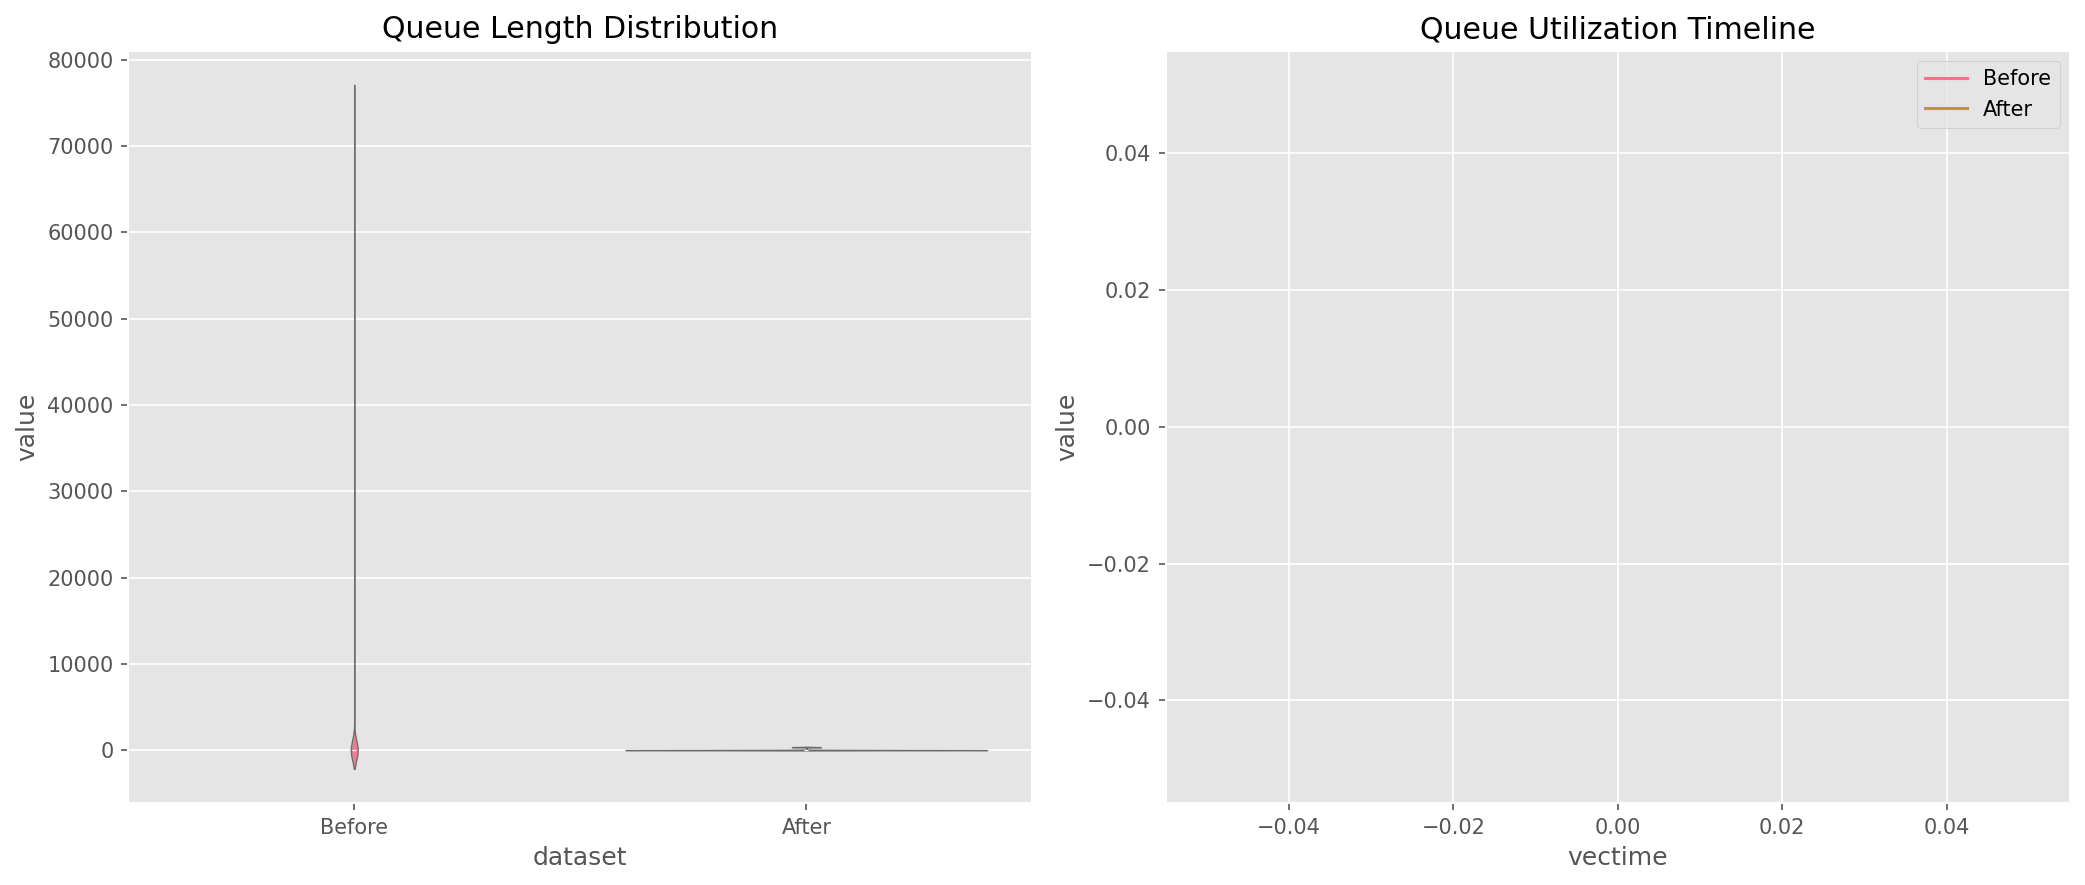

In [325]:
queue_analysis()

### Correlation analysis

In [326]:
def correlation_analysis():
    merged = pd.merge(
        df_before_clean.pivot_table(index='module', columns='metric', values='value'),
        df_after_clean.pivot_table(index='module', columns='metric', values='value'),
        left_index=True, 
        right_index=True,
        suffixes=('_before', '_after')
    )
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(
        merged.corr().loc[merged.filter(like='_before').columns, merged.filter(like='_after').columns],
        annot=True, 
        fmt=".2f",
        cmap='coolwarm',
        ax=ax
    )
    plt.title('Cross-Metric Correlation Changes')
    plt.show()

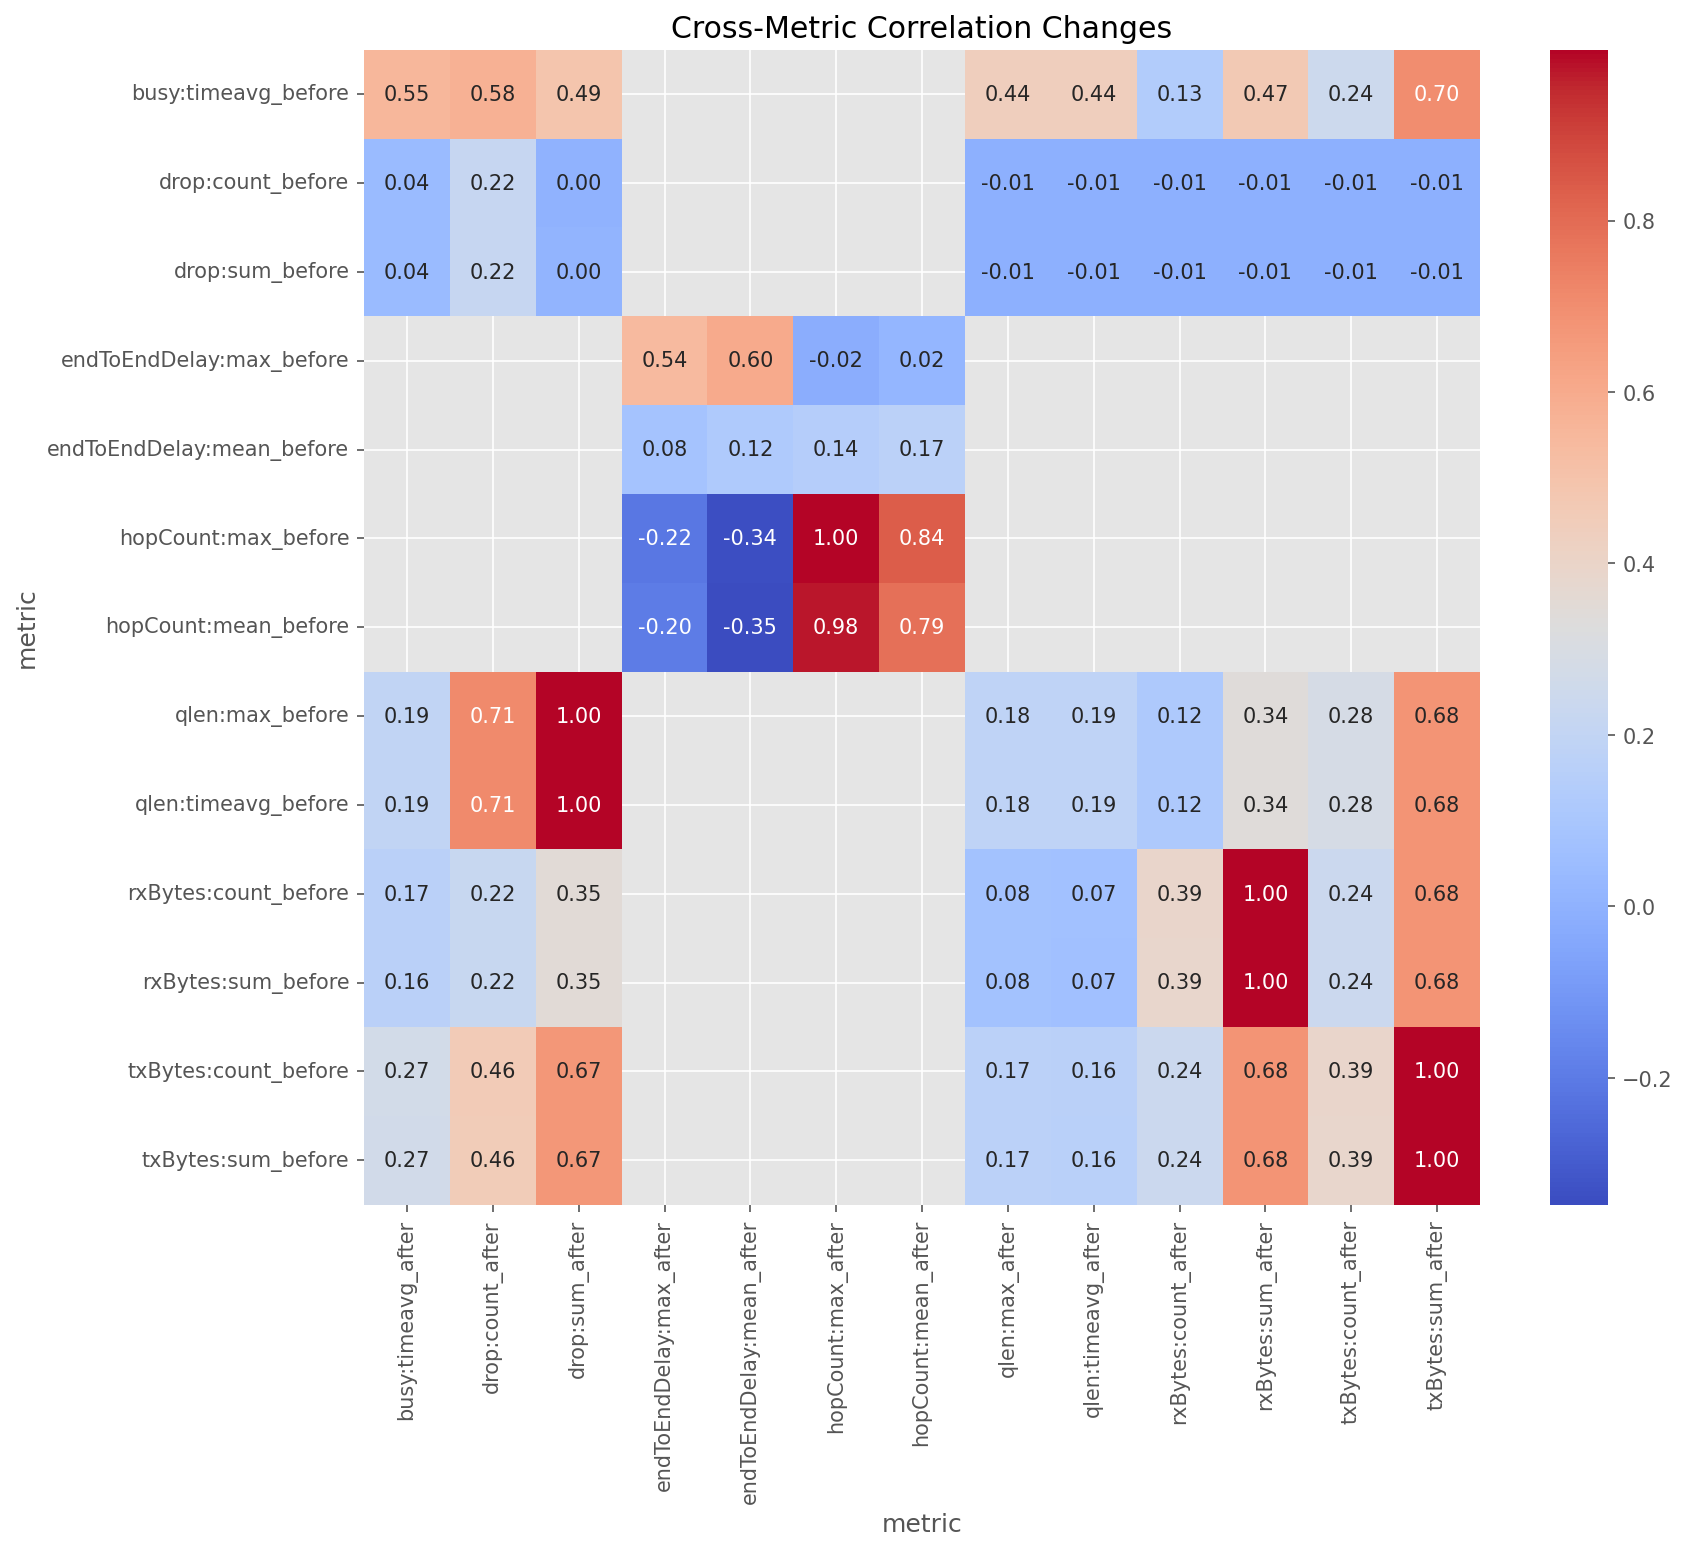

In [327]:
correlation_analysis()

### Statistical report

In [328]:
def enhanced_statistical_report():
    metrics = [
        'hopCount:mean', 'endToEndDelay:mean', 
        'drop:count', 'txBytes:sum', 'busy:timeavg'
    ]
    
    results = []
    for metric in metrics:
        before = df_before_clean[df_before_clean['metric'] == metric]['value']
        after = df_after_clean[df_after_clean['metric'] == metric]['value']
        
        t_stat, p_val = stats.ttest_ind(before, after, equal_var=False)
        mwu_stat, mwu_p = stats.mannwhitneyu(before, after)
        cohen_d = (after.mean() - before.mean()) / (np.sqrt((before.std()**2 + after.std()**2)/2))
        
        results.append({
            'Metric': metric.split(':')[0],
            'Δ Mean (%)': (after.mean() - before.mean())/before.mean()*100,
            'p-value (t-test)': p_val,
            'p-value (MWU)': mwu_p,
            "Cohen's d": cohen_d,
            'CLES (%)': stats.mannwhitneyu(before, after).pvalue*100
        })
    
    df = pd.DataFrame(results)
    print("\nEnhanced Statistical Report:")
    display(df.style.format({
        'Δ Mean (%)': '{:.2f}%', 
        'p-value (t-test)': '{:.4f}',
        'p-value (MWU)': '{:.4f}',
        "Cohen's d": '{:.2f}',
        'CLES (%)': '{:.2f}%'
    }))


In [329]:
enhanced_statistical_report()


Enhanced Statistical Report:


,Metric,Δ Mean (%),p-value (t-test),p-value (MWU),Cohen's d,CLES (%)
0,hopCount,-14.81%,0.4138,0.4694,-0.23,46.94%
1,endToEndDelay,-81.59%,0.0653,0.4472,-0.54,44.72%
2,drop,397771.50%,0.0000,0.0000,0.25,0.00%
3,txBytes,8.64%,0.5587,0.0000,0.02,0.00%
4,busy,117.14%,0.0000,0.0000,0.26,0.00%


# Final evaluation report

In [330]:
def generate_final_report():
    improvements = []
    for metric in core_metrics:
        before = df_before_clean[df_before_clean['metric'] == metric]['value']
        after = df_after_clean[df_after_clean['metric'] == metric]['value']
        
        improvements.append({
            'Metric': core_metrics[metric],
            'Absolute result': after.mean() - before.mean(),
            'Relative result (%)': ((after.mean() - before.mean())/before.mean())*100,
            "Effect Size (Cohen's d)": (after.mean() - before.mean()) / np.sqrt(
                (before.std()**2 + after.std()**2)/2)
        })
    
    df = pd.DataFrame(improvements)
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    
    sns.barplot(x='Relative result (%)', y='Metric', data=df,
                hue='Metric', dodge=False, ax=ax[0], legend=False)
    ax[0].axvline(0, color='black', linestyle='--')
    
    sns.barplot(x="Effect Size (Cohen's d)", y='Metric', data=df,
                hue='Metric', dodge=False, ax=ax[1], legend=False)
    ax[1].axvline(0.2, color='red', linestyle='--', label='Small')
    ax[1].axvline(0.5, color='orange', linestyle='--', label='Medium')
    ax[1].axvline(0.8, color='green', linestyle='--', label='Large')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\nFinal Improvement Summary:")
    display(df.style.format({
        'Absolute result': '{:.2f}',
        'Relative result (%)': '{:.1f}%',
        "Effect Size (Cohen's d)": '{:.2f}'
    }).background_gradient(subset=['Relative result (%)'], cmap='YlGn'))


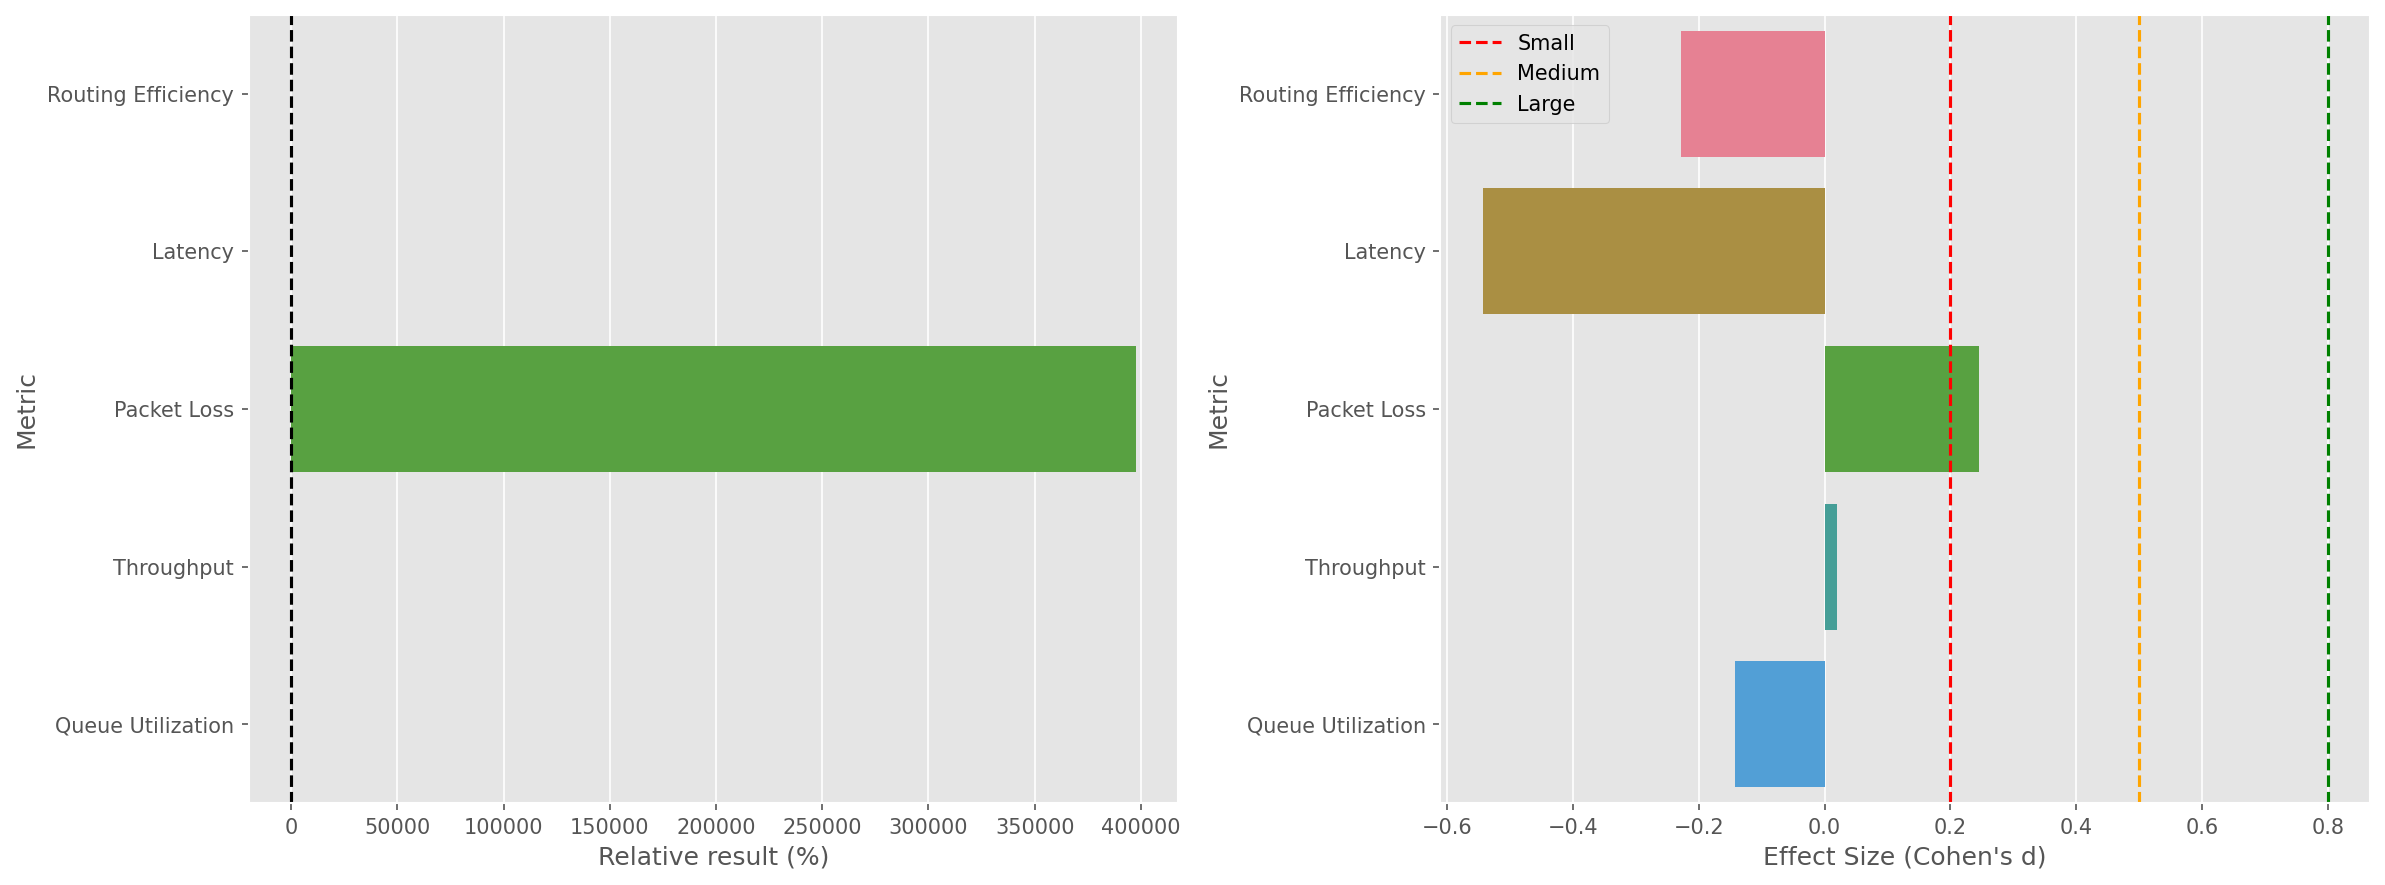


Final Improvement Summary:


,Metric,Absolute result,Relative result (%),Effect Size (Cohen's d)
0,Routing Efficiency,-0.65,-14.8%,-0.23
1,Latency,-2.69,-81.6%,-0.54
2,Packet Loss,1589.95,397771.5%,0.25
3,Throughput,38266178.21,8.6%,0.02
4,Queue Utilization,-483.10,-94.9%,-0.14


In [331]:
generate_final_report()